In [2]:
import numpy as np
import pandas as pd
import json
import os

In [3]:
def select_run_folder(base_dir, run_number):
    selected_folder_path = os.path.join(base_dir, str(run_number))
    if os.path.isdir(selected_folder_path):
        return selected_folder_path
    else:
        print("No run found for provided number")

In [4]:
base_directory = "./Data_collect"

## Data loading functions

In [25]:
def load_gpu_info_parameters(folder_path, filename='gpu_info.json'):
    json_file_path = os.path.join(folder_path, filename)

    # Load the run parameters from the JSON file
    with open(json_file_path, 'r') as json_file:
        gpu_parameters = json.load(json_file)
        return gpu_parameters
    
def load_profiling_parameters(folder_path,N,theta,dt):
    profiling_filename = f"profiling_{N}_{theta}_{dt}.json"
    json_file_path = os.path.join(folder_path,profiling_filename)
    
    with open(json_file_path, 'r') as json_file:
        profile_parameters = json.load(json_file)
        # Extract units and data
        units = profile_parameters['units']
        data = profile_parameters['data']

        # Convert data back to a DataFrame
        df = pd.DataFrame(data)
        
        return df

    # profile_paths = sorted([os.path.join(json_file_path, file) for file in os.listdir(json_file_path) 
    #                 if file not in ['runs.json','gpu_info.json']], reverse=False)

    # for profile_path in profile_paths:
    #     with open(profile_path, 'r') as json_file:
    #         profile_parameters = json.load(json_file)
    #         # Extract units and data
    #         units = profile_parameters['units']
    #         data = profile_parameters['data']

    #         # Convert data back to a DataFrame
    #         df = pd.DataFrame(data)
            
    #         return df

            # # Insert units as the first row
            # df = pd.concat([pd.DataFrame([units]), df], ignore_index=True)

            # Display the resulting DataFrame

            # Initialize an empty dictionary to collect renamed columns for each row
            
def load_profiling_parameters_ncu(folder_path,N,theta,dt):
    profiling_filename = f"profiling_{N}_{theta}_{dt}.json"
    json_file_path = os.path.join(folder_path,profiling_filename)
    
    with open(json_file_path, 'r') as json_file:
            profile_parameters = json.load(json_file)
            # Extract units and data
            units = profile_parameters['units']
            data = profile_parameters['data']

            # Convert data back to a DataFrame
            df = pd.DataFrame(data)
            df['Metric Value'] = pd.to_numeric(df['Metric Value'].str.replace(',', ''), errors='coerce')

            # Define columns to group by
            group_columns = ['ID', 'Process ID', 'Process Name', 'Host Name', 'Kernel Name', 
                            'Context', 'Stream', 'Block Size', 'Grid Size', 'Device', 'CC', 'Section Name']

            # Pivot the DataFrame to aggregate by the specified columns, with Metric Name as new columns
            df_pivot = df.pivot_table(
                index=group_columns,
                columns='Metric Name',
                values='Metric Value',
                aggfunc='first'  # Use 'first' since each group should have unique Metric Values
            ).reset_index()

            # Flatten multi-level columns if necessary (e.g., after pivot)
            df_pivot.columns.name = None  # Remove the column group name
            df_pivot.columns = [col if not isinstance(col, tuple) else col[1] for col in df_pivot.columns]
            
            return df_pivot

def base_filter(prof_df):    
    filter_out = [
        "Device",
        "Context",
        "Stream",
        "Correlation_ID",
        "tex0_cache_sector_queries",
        "tex1_cache_sector_queries",
        "tex0_cache_sector_misses",
        "tex1_cache_sector_misses",
        "l2_subp0_write_sector_misses",
        "l2_subp1_write_sector_misses",
        "l2_subp0_read_sysmem_sector_queries",
        "l2_subp1_read_sysmem_sector_queries",
        "gld_inst_8bit",
        "gld_inst_16bit",
        "gld_inst_32bit",
        "gld_inst_64bit",
        "gld_inst_128bit",
        "gst_inst_8bit",
        "gst_inst_16bit",
        "gst_inst_32bit",
        "gst_inst_64bit",
        "gst_inst_128bit",
        "prof_trigger_00",
        "prof_trigger_01",
        "prof_trigger_02",
        "prof_trigger_03",
        "prof_trigger_04",
        "prof_trigger_05",
        "prof_trigger_06",
        "prof_trigger_07",
        "inst_issued2",
        "generic_load",
        "generic_store",
        "inst_executed_in_trap",
        "active_cycles_in_trap",
        "inst_executed_shared_atom_cas",
        "shared_atom",
        "global_atom_cas",
        "gred_count",
        "divergent_branch",
        "branch",
        "shared_ld_bank_conflict",
        "shared_st_bank_conflict",
        "inst_replay_overhead",
        "shared_load_transactions_per_request",
        "shared_store_transactions_per_request",
        "local_hit_rate",
        "gld_requested_throughput",
        "gst_requested_throughput",
        "local_memory_overhead",
        "tex_cache_throughput",
        "sysmem_utilization",
        "stall_sync",
        "stall_texture",
        "shared_efficiency",
        "cf_issued",
        "ldst_issued",
        "ldst_executed",
        "atomic_transactions_per_request",
        "flop_count_hp",
        "flop_count_hp_add",
        "flop_count_hp_mul",
        "flop_count_hp_fma",
        "inst_fp_16",
        "sysmem_read_utilization",
        "sysmem_write_utilization",
        "pcie_total_data_transmitted",
        "pcie_total_data_received",
        "inst_executed_surface_loads",
        "inst_executed_surface_stores",
        "inst_executed_global_atomics",
        "inst_executed_global_reductions",
        "inst_executed_surface_atomics",
        "inst_executed_surface_reductions",
        "inst_executed_shared_atomics",
        "inst_executed_tex_ops",
        "l2_surface_load_bytes",
        "l2_global_reduction_bytes",
        "l2_surface_store_bytes",
        "l2_surface_reduction_bytes",
        "l2_surface_atomic_store_bytes",
        "surface_load_requests",
        "surface_store_requests",
        "global_reduction_requests",
        "surface_atomic_requests",
        "surface_reduction_requests",
        "sysmem_read_bytes",
        "sysmem_write_bytes",
        "texture_load_requests",
        "unique_warps_launched",
        "tex_utilization",
        "l2_utilization",
        "shared_utilization",
        "ldst_fu_utilization",
        "cf_fu_utilization",
        "special_fu_utilization",
        "tex_fu_utilization",
        "single_precision_fu_utilization",
        "double_precision_fu_utilization",
        "dram_utilization",
        "half_precision_fu_utilization",
        "ecc_transactions",
        "ecc_throughput",
        "l2_global_load_bytes",
        "l2_local_load_bytes",
        "l2_surface_load_bytes",
        "l2_local_global_store_bytes",
        "l2_global_reduction_bytes",
        "l2_global_atomic_store_bytes",
        "l2_surface_store_bytes",
        "l2_surface_reduction_bytes",
        "l2_surface_atomic_store_bytes"
        ]
    return prof_df.drop(filter_out, axis=1, errors='ignore')

def ncu_2_nvprof(df):
    nv = {}
    nv["Device"] = "NVIDIA GeForce RTX 3070 8GB (0)"
    nv["Context"] = df['Context']
    nv["Stream"] = df['Stream']
    nv["Kernel"] = df['Kernel Name']
    nv["Correlation_ID"] = ""
    nv["tex0_cache_sector_queries"] = ""
    nv["tex1_cache_sector_queries"] = ""
    nv["tex0_cache_sector_misses"] = ""
    nv["tex1_cache_sector_misses"] = ""
    nv["fb_subp0_read_sectors"] = df['dram__sectors_read.sum']
    nv["fb_subp1_read_sectors"] = df['dram__sectors_read.sum']
    nv['fb_subp0_write_sectors'] = df['dram__sectors_write.sum']
    nv['fb_subp1_write_sectors'] = df['dram__sectors_write.sum']
    nv['l2_subp0_write_sector_misses'] = df['lts__t_sectors_op_write_lookup_miss.sum']
    nv['l2_subp1_write_sector_misses'] = df['lts__t_sectors_op_write_lookup_miss.sum']
    nv['l2_subp0_read_sector_misses'] = df['lts__t_sectors_op_read_lookup_miss.sum']
    nv['l2_subp1_read_sector_misses'] = df['lts__t_sectors_op_read_lookup_miss.sum']
    nv['l2_subp0_read_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_read.sum']
    nv['l2_subp1_read_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_read.sum']
    nv['l2_subp0_write_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_write.sum']
    nv['l2_subp1_write_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_write.sum']
    nv['l2_subp0_read_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_read_lookup_hit.sum']
    nv['l2_subp1_read_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_read_lookup_hit.sum']
    nv['l2_subp0_write_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_write_lookup_hit.sum']
    nv['l2_subp1_write_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_write_lookup_hit.sum']
    nv['l2_subp0_total_read_sector_queries'] = df['lts__t_sectors_op_read.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp1_total_read_sector_queries'] = df['lts__t_sectors_op_read.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp0_total_write_sector_queries'] = df['lts__t_sectors_op_write.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp1_total_write_sector_queries'] = df['lts__t_sectors_op_write.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp0_read_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_read.sum']
    nv['l2_subp1_read_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_read.sum']
    nv['l2_subp0_write_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_write.sum']
    nv['l2_subp1_write_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_write.sum']
    nv['elapsed_cycles_sm'] = df['sm__cycles_elapsed.sum']
    nv['gld_inst_8bit'] = ''
    nv['gld_inst_16bit'] = ''
    nv['gld_inst_32bit'] = ''
    nv['gld_inst_64bit'] = ''
    nv['gld_inst_128bit'] = ''
    nv['gst_inst_8bit'] = ''
    nv['gst_inst_16bit'] = ''
    nv['gst_inst_32bit'] = ''
    nv['gst_inst_64bit'] = ''
    nv['gst_inst_128bit'] = ''
    nv['prof_trigger_00'] = ''
    nv['prof_trigger_01'] = ''
    nv['prof_trigger_02'] = ''
    nv['prof_trigger_03'] = ''
    nv['prof_trigger_04'] = ''
    nv['prof_trigger_05'] = ''
    nv['prof_trigger_06'] = ''
    nv['prof_trigger_07'] = ''
    nv['warps_launched'] = df['smsp__warps_launched.sum']
    nv['inst_issued0'] = df['smsp__issue_inst0.sum']
    nv['inst_issued1'] = df['sm__inst_issued.sum']
    nv['inst_issued2'] = ''
    nv['inst_executed'] = df['sm__inst_executed.sum']
    nv['thread_inst_executed'] = df['smsp__thread_inst_executed.sum']
    nv['not_predicated_off_thread_inst_executed'] = df['smsp__thread_inst_executed_pred_on.sum']
    nv['active_cycles'] = df['sm__cycles_active.sum']
    nv['active_warps'] = df['sm__warps_active.sum']
    nv['global_load'] = df['smsp__inst_executed_op_global_ld.sum']
    nv['global_store'] = df['smsp__inst_executed_op_global_st.sum']
    nv['generic_load'] = df['smsp__inst_executed_op_generic_ld.sum']
    nv['generic_store'] = df['smsp__inst_executed_op_generic_st.sum']
    nv['inst_executed_in_trap'] = ''
    nv['active_cycles_in_trap'] = ''
    nv['local_store'] = df['smsp__inst_executed_op_local_st.sum']
    nv['local_load'] = df['smsp__inst_executed_op_local_ld.sum']
    nv['shared_load'] = df['smsp__inst_executed_op_shared_ld.sum']
    nv['shared_store'] = df['smsp__inst_executed_op_shared_st.sum']
    nv['inst_executed_shared_atom_cas'] = ''
    nv['shared_atom'] = df['smsp__inst_executed_op_shared_atom.sum']
    nv['global_atom_cas'] = df['smsp__inst_executed_op_generic_atom_dot_cas.sum']
    nv['atom_count'] = df['smsp__inst_executed_op_generic_atom_dot_alu.sum']
    nv['gred_count'] = df['smsp__inst_executed_op_global_red.sum']
    nv['divergent_branch'] = ''
    nv['branch'] = ''
    nv['shared_ld_bank_conflict'] = df['l1tex__data_bank_conflicts_pipe_lsu_mem_shared_op_ld.sum']
    nv['shared_st_bank_conflict'] = df['l1tex__data_bank_conflicts_pipe_lsu_mem_shared_op_st.sum']
    nv['shared_ld_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_ld.sum']
    nv['shared_st_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_st.sum']
    nv['active_cycles_pm'] = df['sm__cycles_active.sum']
    nv['active_warps_pm'] = df['sm__warps_active.sum']
    nv['elapsed_cycles_pm'] = df['sm__cycles_elapsed.sum']
    nv['inst_per_warp'] = df['smsp__average_inst_executed_per_warp.ratio']
    nv['branch_efficiency'] = df['smsp__sass_average_branch_targets_threads_uniform.pct']
    nv['warp_execution_efficiency'] = df['smsp__thread_inst_executed_per_inst_executed.ratio']
    nv['warp_nonpred_execution_efficiency'] = df['smsp__thread_inst_executed_per_inst_executed.pct']
    nv['inst_replay_overhead'] = ''
    nv['shared_load_transactions_per_request'] = ''
    nv['shared_store_transactions_per_request'] = ''
    nv['local_load_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_local_op_ld.ratio']
    nv['local_store_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_local_op_st.ratio']
    nv['gld_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_global_op_ld.ratio']
    nv['gst_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_global_op_st.ratio']
    nv['shared_store_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_st.sum']
    nv['shared_load_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_ld.sum']
    nv['local_load_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_local_op_ld.sum']
    nv['local_store_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_local_op_st.sum']
    nv['gld_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_global_op_ld.sum']
    nv['gst_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_global_op_st.sum']
    nv['sysmem_read_transactions'] = df['lts__t_sectors_aperture_sysmem_op_read.sum']
    nv['sysmem_write_transactions'] = df['lts__t_sectors_aperture_sysmem_op_write.sum']
    nv['l2_read_transactions'] = df['lts__t_sectors_op_read.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_write_transactions'] = df['lts__t_sectors_op_write.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['global_hit_rate'] = (df['l1tex__t_sectors_pipe_lsu_mem_global_op_ld_lookup_hit.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_st_lookup_hit.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_red_lookup_hit.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_atom_lookup_hit.sum']) / (df['l1tex__t_sectors_pipe_lsu_mem_global_op_ld.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_st.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_red.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_atom.sum'])
    nv['local_hit_rate'] = ''
    nv['gld_requested_throughput'] = ''
    nv['gst_requested_throughput'] = ''
    nv['gld_throughput'] = df['l1tex__t_bytes_pipe_lsu_mem_global_op_ld.sum.per_second']
    nv['gst_throughput'] = df['l1tex__t_bytes_pipe_lsu_mem_global_op_st.sum.per_second']
    nv['local_memory_overhead'] = ''
    nv['tex_cache_hit_rate'] = df['l1tex__t_sector_hit_rate.pct']
    nv['l2_tex_read_hit_rate'] = df['lts__t_sector_op_read_hit_rate.pct']
    nv['l2_tex_write_hit_rate'] = df['lts__t_sector_op_write_hit_rate.pct']
    nv['tex_cache_throughput'] = ''
    nv['l2_tex_read_throughput'] = df['lts__t_sectors_srcunit_tex_op_read.sum.per_second']
    nv['l2_tex_write_throughput'] = df['lts__t_sectors_srcunit_tex_op_write.sum.per_second']
    nv['l2_read_throughput'] = df['lts__t_sectors_op_read.sum.per_second'] + df['lts__t_sectors_op_atom.sum.per_second'] + df['lts__t_sectors_op_red.sum.per_second']
    nv['l2_write_throughput'] = df['lts__t_sectors_op_write.sum.per_second'] + df['lts__t_sectors_op_atom.sum.per_second'] + df['lts__t_sectors_op_red.sum.per_second']
    nv['sysmem_read_throughput'] = df['lts__t_sectors_aperture_sysmem_op_read.sum.per_second']
    nv['sysmem_write_throughput'] = df['lts__t_sectors_aperture_sysmem_op_write.sum.per_second']
    nv['local_load_throughput'] = df['l1tex__t_bytes_pipe_lsu_mem_local_op_ld.sum.per_second']
    nv['local_store_throughput'] = df['l1tex__t_sectors_pipe_lsu_mem_local_op_st.sum.per_second']
    nv['shared_load_throughput'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_ld.sum.per_second']
    nv['shared_store_throughput'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_st.sum.per_second']
    nv['gld_efficiency'] = df['smsp__sass_average_data_bytes_per_sector_mem_global_op_ld.pct']
    nv['gst_efficiency'] = df['smsp__sass_average_data_bytes_per_sector_mem_global_op_st.pct']
    nv['tex_cache_transactions'] = df['l1tex__lsu_writeback_active.avg.pct_of_peak_sustained_active'] + df['l1tex__tex_writeback_active.avg.pct_of_peak_sustained_active']
    nv['flop_count_dp'] = df['smsp__sass_thread_inst_executed_op_dadd_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_dmul_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_dfma_pred_on.sum'] * 2
    nv['flop_count_dp_add'] = df['smsp__sass_thread_inst_executed_op_dadd_pred_on.sum']
    nv['flop_count_dp_fma'] = df['smsp__sass_thread_inst_executed_op_dfma_pred_on.sum']
    nv['flop_count_dp_mul'] = df['smsp__sass_thread_inst_executed_op_dmul_pred_on.sum']
    nv['inst_issued'] = df['smsp__inst_issued.sum']
    nv['sysmem_utilization'] = ''
    nv['stall_inst_fetch'] = df['smsp__warp_issue_stalled_no_instruction_per_warp_active.pct']
    nv['stall_exec_dependency'] = df['smsp__warp_issue_stalled_short_scoreboard_per_warp_active.pct'] + df['smsp__warp_issue_stalled_wait_per_warp_active.pct'] 
    nv['stall_memory_dependency'] = df['smsp__warp_issue_stalled_long_scoreboard_per_warp_active.pct']
    nv['stall_texture'] = df['smsp__warp_issue_stalled_tex_throttle_per_warp_active.pct']
    nv['stall_sync'] = df['smsp__warp_issue_stalled_barrier_per_warp_active.pct'] + df['smsp__warp_issue_stalled_membar_per_warp_active.pct']
    nv['stall_other'] = df['smsp__warp_issue_stalled_dispatch_stall_per_warp_active.pct'] + df['smsp__warp_issue_stalled_misc_per_warp_active.pct']
    nv['stall_constant_memory_dependency'] = df['smsp__warp_issue_stalled_imc_miss_per_warp_active.pct']
    nv['stall_pipe_busy'] = df['smsp__warp_issue_stalled_math_pipe_throttle_per_warp_active.pct'] + df['smsp__warp_issue_stalled_mio_throttle_per_warp_active.pct']
    nv['shared_efficiency'] = ''
    nv['inst_fp_64'] = df['smsp__sass_thread_inst_executed_op_fp64_pred_on.sum']
    nv['inst_bit_convert'] = df['smsp__sass_thread_inst_executed_op_conversion_pred_on.sum']
    nv['inst_control'] = df['smsp__sass_thread_inst_executed_op_control_pred_on.sum']
    nv['inst_compute_ld_st'] = df['smsp__sass_thread_inst_executed_op_memory_pred_on.sum']
    nv['inst_misc'] = df['smsp__sass_thread_inst_executed_op_misc_pred_on.sum']
    nv['issue_slots'] = df['smsp__inst_issued.sum']
    nv['cf_issued'] = ''
    nv['cf_executed'] = df['smsp__inst_executed_pipe_cbu.sum'] + df['smsp__inst_executed_pipe_adu.sum']
    nv['ldst_issued'] = ''
    nv['ldst_executed'] = ''
    nv['atomic_transactions'] = df['l1tex__t_set_accesses_pipe_lsu_mem_global_op_atom.sum']  + df['l1tex__t_set_accesses_pipe_lsu_mem_global_op_red.sum']
    nv['atomic_transactions_per_request'] = (df['l1tex__t_sectors_pipe_lsu_mem_global_op_atom.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_red.sum']) / (df['l1tex__t_requests_pipe_lsu_mem_global_op_atom.sum'] + df['l1tex__t_requests_pipe_lsu_mem_global_op_red.sum'])
    nv['l2_atomic_throughput'] = 2 * (df['lts__t_sectors_op_atom.sum.per_second'] + df['lts__t_sectors_op_red.sum.per_second'])
    nv['l2_atomic_transactions'] = 2 * (df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum'])
    nv['l2_tex_read_transactions'] = df['lts__t_sectors_srcunit_tex_op_read.sum']
    nv['stall_memory_throttle'] = df['smsp__warp_issue_stalled_drain_per_warp_active.pct'] + df['smsp__warp_issue_stalled_lg_throttle_per_warp_active.pct']
    nv['stall_not_selected'] = df['smsp__warp_issue_stalled_not_selected_per_warp_active.pct']
    nv['l2_tex_write_transactions'] = df['lts__t_sectors_srcunit_tex_op_write.sum']
    nv['flop_count_hp'] = df['smsp__sass_thread_inst_executed_op_hadd_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_hmul_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_hfma_pred_on.sum'] * 2
    nv['flop_count_hp_add'] = df['smsp__sass_thread_inst_executed_op_hadd_pred_on.sum']
    nv['flop_count_hp_mul'] = df['smsp__sass_thread_inst_executed_op_hmul_pred_on.sum']
    nv['flop_count_hp_fma'] = df['smsp__sass_thread_inst_executed_op_hfma_pred_on.sum']
    nv['inst_fp_16'] = df['smsp__sass_thread_inst_executed_op_fp16_pred_on.sum']
    nv['sysmem_read_utilization'] = ''
    nv['sysmem_write_utilization'] = ''
    nv['pcie_total_data_transmitted'] = ''
    nv['pcie_total_data_received'] = ''
    nv['inst_executed_global_loads'] = df['smsp__inst_executed_op_global_ld.sum']
    nv['inst_executed_local_loads'] = df['smsp__inst_executed_op_local_ld.sum']
    nv['inst_executed_shared_loads'] = df['smsp__inst_executed_op_shared_ld.sum']
    nv['inst_executed_surface_loads'] = df['smsp__inst_executed_op_surface_ld.sum'] + df['smsp__inst_executed_op_shared_atom_dot_alu.sum'] + df['smsp__inst_executed_op_shared_atom_dot_cas.sum']
    nv['inst_executed_global_stores'] = df['smsp__inst_executed_op_global_st.sum']
    nv['inst_executed_local_stores'] = df['smsp__inst_executed_op_local_st.sum']
    nv['inst_executed_shared_stores'] = df['smsp__inst_executed_op_shared_st.sum']
    nv['inst_executed_surface_stores'] = df['smsp__inst_executed_op_surface_st.sum']
    nv['inst_executed_global_atomics'] = df['smsp__sass_inst_executed_op_global_atom.sum']
    nv['inst_executed_global_reductions'] = df['smsp__inst_executed_op_global_red.sum']
    nv['inst_executed_surface_atomics'] = df['smsp__inst_executed_op_surface_atom.sum']
    nv['inst_executed_surface_reductions'] = df['smsp__inst_executed_op_surface_red.sum']
    nv['inst_executed_shared_atomics'] = df['smsp__inst_executed_op_shared_atom.sum'] + df['smsp__inst_executed_op_shared_atom_dot_alu.sum'] + df['smsp__inst_executed_op_shared_atom_dot_cas.sum']
    nv['inst_executed_tex_ops'] = df['smsp__inst_executed_op_texture.sum']
    nv['l2_global_load_bytes'] = '' #df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_global_op_ld.sum']
    nv['l2_local_load_bytes'] = '' #df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_local_op_ld.sum']
    nv['l2_surface_load_bytes'] = '' #df['lts__t_bytes_equiv_l1sectormiss_pipe_tex_mem_surface_op_ld.sum']
    nv['l2_local_global_store_bytes'] = '' #df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_local_op_st.sum'] + df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_global_op_st.sum']
    nv['l2_global_reduction_bytes'] = ''
    nv['l2_global_atomic_store_bytes'] = '' #df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_global_op_atom.sum']
    nv['l2_surface_store_bytes'] = '' #df['lts__t_bytes_equiv_l1sectormiss_pipe_tex_mem_surface_op_st.sum']
    nv['l2_surface_reduction_bytes'] = ''
    nv['l2_surface_atomic_store_bytes'] = ''
    nv['global_load_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_ld.sum']
    nv['local_load_requests'] = df['l1tex__t_requests_pipe_lsu_mem_local_op_ld.sum']
    nv['surface_load_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_ld.sum']
    nv['global_store_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_st.sum']
    nv['local_store_requests'] = df['l1tex__t_requests_pipe_lsu_mem_local_op_st.sum']
    nv['surface_store_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_st.sum']
    nv['global_atomic_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_atom.sum']
    nv['global_reduction_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_red.sum']
    nv['surface_atomic_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_atom.sum']
    nv['surface_reduction_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_red.sum']
    nv['sysmem_read_bytes'] = ''
    nv['sysmem_write_bytes'] = ''
    nv['l2_tex_hit_rate'] = df['lts__t_sector_hit_rate.pct']
    nv['texture_load_requests'] = df['l1tex__t_requests_pipe_tex_mem_texture.sum']
    nv['unique_warps_launched'] = ''
    nv['sm_efficiency'] = df['smsp__cycles_active.avg.pct_of_peak_sustained_elapsed']
    nv['achieved_occupancy'] = df['sm__warps_active.avg.pct_of_peak_sustained_active'] / 100
    nv['ipc'] = df['smsp__inst_executed.avg.per_cycle_active']
    nv['issued_ipc'] = df['smsp__inst_issued.avg.per_cycle_active']
    nv['issue_slot_utilization'] = df['smsp__issue_active.avg.pct_of_peak_sustained_active']
    nv['eligible_warps_per_cycle'] = df['smsp__warps_eligible.sum.per_cycle_active']
    nv['tex_utilization'] = ''
    nv['l2_utilization'] = df['lts__t_sectors.avg.pct_of_peak_sustained_elapsed']
    nv['shared_utilization'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared.avg.pct_of_peak_sustained_elapsed']
    nv['ldst_fu_utilization'] = df['smsp__inst_executed_pipe_lsu.avg.pct_of_peak_sustained_active']
    nv['cf_fu_utilization'] = ''
    nv['special_fu_utilization'] = df['smsp__inst_executed_pipe_xu.avg.pct_of_peak_sustained_active']
    nv['tex_fu_utilization'] = df['smsp__inst_executed_pipe_tex.avg.pct_of_peak_sustained_active']
    nv['single_precision_fu_utilization'] = df['smsp__pipe_fma_cycles_active.avg.pct_of_peak_sustained_active']
    nv['double_precision_fu_utilization'] = df['smsp__inst_executed_pipe_fp64.avg.pct_of_peak_sustained_active']
    nv['dram_read_transactions'] = df['dram__sectors_read.sum']
    nv['dram_write_transactions'] = df['dram__sectors_write.sum']
    nv['dram_read_throughput'] = df['dram__bytes_read.sum.per_second']
    nv['dram_write_throughput'] = df['dram__bytes_write.sum.per_second']
    nv['dram_utilization'] = df['dram__throughput.avg.pct_of_peak_sustained_elapsed']
    nv['half_precision_fu_utilization'] = ''
    nv['ecc_transactions'] = ''
    nv['ecc_throughput'] = ''
    nv['dram_read_bytes'] = df['dram__bytes_read.sum']
    nv['dram_write_bytes'] = df['dram__bytes_write.sum']

    return pd.DataFrame(nv)

def profile_flatten(df):
    renamed_columns = {}

    # Loop through each row, renaming columns and storing them in the dictionary
    for _, row in df.iterrows():
        kernel = row['Kernel']
        renamed_row = row.drop('Kernel')  # Drop the 'Kernel' column
        renamed_row.index = [f"{col} ({kernel})" for col in renamed_row.index]  # Rename columns with 'Kernel'
        renamed_columns.update(renamed_row.to_dict())  # Add to dictionary

    # Create a DataFrame from the dictionary as a single row
    final_df = pd.DataFrame([renamed_columns])

    return final_df

def load_run_parameters(folder_path, filename='runs.json'):
    json_file_path = os.path.join(folder_path, filename)
    
    # Load the run parameters from the JSON file
    with open(json_file_path, 'r') as json_file:
        run_parameters = json.load(json_file)
        return run_parameters

def load_all_parameters(folder_path, profiler='nvprof'):

    gpu_parameters = load_gpu_info_parameters(folder_path)
    run_parameters = load_run_parameters(folder_path)

    for idx, param in enumerate(run_parameters):
        print(idx)
        param = param | gpu_parameters[0]
    
    # return run_parameters
        if param["profiling"] is True:  
            N = param["N"]
            theta = param["theta"]
            dt = param["dt"]

            if profiler == 'nvprof':
                profiling_df = load_profiling_parameters(folder_path,N,theta,dt)
                
            if profiler == 'ncu':
                profiling_df = load_profiling_parameters_ncu(folder_path,N,theta,dt)
                profiling_df = ncu_2_nvprof(profiling_df)

            profiling_df = base_filter(profiling_df)
            profiling_df = profile_flatten(profiling_df)

        param = param | profiling_df.to_dict(orient="records")[0]
        run_parameters[idx] = param

    return pd.DataFrame(run_parameters)

## Load 1060

In [27]:
current_run_directory = select_run_folder(base_directory,2)
gpu1 = load_all_parameters(current_run_directory,"nvprof")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 3070

In [28]:
current_run_directory = select_run_folder(base_directory,6)
gpu2 = load_all_parameters(current_run_directory,"ncu")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 3060

In [29]:
current_run_directory = select_run_folder(base_directory,7)
gpu3 = load_all_parameters(current_run_directory,"ncu")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 2070 SUPER

In [30]:
current_run_directory = select_run_folder(base_directory,8)
gpu4 = load_all_parameters(current_run_directory,"ncu")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 4060 Ti

In [31]:
current_run_directory = select_run_folder(base_directory,9)
gpu5 = load_all_parameters(current_run_directory,"ncu")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Generate full

In [32]:
full = pd.concat([gpu1,gpu2,gpu3,gpu4,gpu5]).reset_index(drop=True)

In [33]:
full.to_csv("Full/full_3.csv", sep=',')

In [794]:
full = pd.read_csv("Full/full_3.csv", index_col=0)

/tmp/ipykernel_3989848/2210809073.py:1: DtypeWarning: Columns (58,76,78,100,153) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv("Full/full_3.csv", index_col=0)


In [797]:
full = full.drop(['dram_read_bytes (dev_approximate_gravity)'], axis=1, errors='ignore')

In [11]:
# base_directory = "./Data_collect"
# current_run_directory = select_run_folder(base_directory,2)
# load_run_parameters(current_run_directory,"nvprof")

In [12]:
# base_directory = "./Data_collect"
# current_run_directory = select_run_folder(base_directory,2)
# res = load_profiling_parameters(current_run_directory)
# # list(res.columns.values)
# print(res.to_string())


## Analysis

In [17]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Sample DataFrame, replace this with your actual DataFrame
# df = pd.DataFrame({
#     'Metric1': [100, 200, 300, 400, 500],
#     'Metric2': [10, 20, 3, 40, 50],
#     'Metric3': [25, 10, 135, 20, 245]
# })

# # Step 1: Log Scaling (handle zero values by adding a small constant if needed)
# df_scaled = np.log1p(df)  # Use log1p to avoid issues with zero values (log(x+1))

# # Step 2: Normalization (scaling between 0 and 1)
# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df.columns)

# # Step 3: Compute Spearman Correlation and filter pairs above threshold
# correlation_matrix = df_normalized.corr(method='spearman')

# # Apply threshold to find highly correlated pairs (absolute value > 0.75)
# threshold = 0.6
# high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# # Display results
# print("Log-scaled data:")
# display(df_scaled)
# print("\nNormalized data:")
# display(df_normalized)
# print("\nHigh correlation pairs (|corr| > 0.75):")
# display(high_corr_pairs.dropna(how='all', axis=0).dropna(how='all', axis=1))


In [18]:
# df

## Test corr inputs

In [46]:
df_normalized.loc[df_normalized['N'].isin([0.9])]

,N,theta,dt,Clock Rate (MHz),Compute Capability,Total Memory (MB),Multiprocessors (SMs),Max Threads Per SM,Total Cores,Warp Size,...,Half Precision FLOP/s,Single Precision FLOP/s,Double Precision FLOP/s,Concurrent Kernels,Threads Per Warp,Global Memory Bandwidth (GB/s),Global Memory Size (MB),L2 Cache Size,Memcpy Engines,exec_time_avg


In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


X = full[["N","theta","dt","Clock Rate (MHz)","Compute Capability",
                "Total Memory (MB)",
                "Multiprocessors (SMs)",
                "Max Threads Per SM",
                "Total Cores",
                "Warp Size",
                "Max Threads Per Block",
                "Max Blocks Per SM",
                "Shared Memory Per Block (KB)",
                "Shared Memory Per SM (KB)",
                "Registers Per Block",
                "Registers Per SM",
                "L1 Cache Size (KB)",
                "L2 Cache Size (KB)",
                "Memory Bus Width (bits)",
                "Memory Bandwidth (GB/s)",
                "Clock Rate (MHz)",
                "Warps Per SM",
                "Blocks Per SM",
                "Half Precision FLOP/s",
                "Single Precision FLOP/s",
                "Double Precision FLOP/s",
                "Concurrent Kernels",
                "Threads Per Warp",
                "Global Memory Bandwidth (GB/s)",
                "Global Memory Size (MB)",
                "L2 Cache Size",
                "Memcpy Engines"]].apply(pd.to_numeric, errors='coerce')

y = full["exec_time_avg"].apply(pd.to_numeric, errors='coerce')
# define feature selection
fs = SelectKBest(score_func=mutual_info_regression, k=5)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)


# Using f_regression
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
print(selector.get_feature_names_out())


# Using mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k=5)
selector.fit(X, y)
print(selector.get_feature_names_out())

(2100, 5)
['N' 'theta' 'Half Precision FLOP/s' 'Single Precision FLOP/s'
 'Double Precision FLOP/s']
['N' 'Multiprocessors (SMs)' 'Half Precision FLOP/s'
 'Single Precision FLOP/s' 'Double Precision FLOP/s']


## Correlation analysis

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Example DataFrame, replace this with your actual DataFrame
# df = pd.DataFrame({
#     'Metric1': [100, 200, 300, 400, 500],
#     'Metric2': [10, 20, 3, 40, 50],
#     'Metric3': [25, 10, 135, 20, 245]
# })

sim_params = ["N","theta","dt","I"]
exec_times = ["exec_time_min","exec_time_max"] # "exec_time_avg"
gpu_params = ["profiling",
                "Name",
                "Compute Capability",
                "Total Memory (MB)",
                "Multiprocessors (SMs)",
                "Max Threads Per SM",
                "Total Cores",
                "Warp Size",
                "Max Threads Per Block",
                "Max Blocks Per SM",
                "Shared Memory Per Block (KB)",
                "Shared Memory Per SM (KB)",
                "Registers Per Block",
                "Registers Per SM",
                "L1 Cache Size (KB)",
                "L2 Cache Size (KB)",
                "Memory Bus Width (bits)",
                "Memory Bandwidth (GB/s)",
                "Clock Rate (MHz)",
                "Warps Per SM",
                "Blocks Per SM",
                "Half Precision FLOP/s",
                "Single Precision FLOP/s",
                "Double Precision FLOP/s",
                "Concurrent Kernels",
                "Threads Per Warp",
                "Global Memory Bandwidth (GB/s)",
                "Global Memory Size (MB)",
                "L2 Cache Size",
                "Memcpy Engines"
                ]

df = full.drop(sim_params + exec_times + gpu_params,axis=1).apply(pd.to_numeric, errors='coerce')


print(df.shape)

# print(df.dtypes.to_string())
# Step 1: Log Scaling (handle zero values by adding a small constant if needed)
df_scaled = np.log1p(df)  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df.columns)

# Step 1: Compute the correlation matrix
correlation_matrix = df_normalized.corr(method='spearman').abs()  # Using absolute values for correlation strength

# Step 2: Set the threshold and identify columns with high correlations (excluding self-correlations)
threshold = 0.95

kernel_corr = correlation_matrix['exec_time_avg']

# Use a mask to exclude diagonal (self-correlations) by setting them to False
# high_corr_mask = (kernel_corr > threshold) & (kernel_corr != 1.0)

# # Identify columns with any high correlation
# high_corr_columns = high_corr_mask.any(axis=1).index[high_corr_mask.any(axis=1).values]

high_corr_features = kernel_corr[(kernel_corr) > threshold].index.tolist()
high_corr_features = [feature for feature in high_corr_features if feature != 'exec_time_avg']

# Step 3: Filter the DataFrame to include only columns with high correlation pairs
filtered_df = df[high_corr_features]

# Display the resulting filtered DataFrame
# print(kernel_corr.to_string())
display(filtered_df)
print(filtered_df.shape)

# Step 5: Display results
print("Features correlated with Kernel Execution Times above the threshold:")
for feature in high_corr_features:
    print(f"{feature}: Correlation = {kernel_corr[feature]:.2f}")

(2100, 33)


,N,Compute Capability,Total Memory (MB),Multiprocessors (SMs),Total Cores,Max Blocks Per SM,Shared Memory Per SM (KB),L1 Cache Size (KB),Memory Bandwidth (GB/s),Blocks Per SM,Half Precision FLOP/s,Single Precision FLOP/s,Double Precision FLOP/s,Global Memory Bandwidth (GB/s),Global Memory Size (MB)
0,100,6.1,6065,10,1280,32,96,96,192,32,2111,1055,1055,192,6065
1,100,6.1,6065,10,1280,32,96,96,192,32,2111,1055,1055,192,6065
2,100,6.1,6065,10,1280,32,96,96,192,32,2111,1055,1055,192,6065
3,100,6.1,6065,10,1280,32,96,96,192,32,2111,1055,1055,192,6065
4,100,6.1,6065,10,1280,32,96,96,192,32,2111,1055,1055,192,6065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,10000000,8.9,7843,34,4352,24,100,100,288,24,10396,5198,5198,288,7843
2096,10000000,8.9,7843,34,4352,24,100,100,288,24,10396,5198,5198,288,7843
2097,10000000,8.9,7843,34,4352,24,100,100,288,24,10396,5198,5198,288,7843
2098,10000000,8.9,7843,34,4352,24,100,100,288,24,10396,5198,5198,288,7843


(2100, 15)
Features correlated with Kernel Execution Times above the threshold:
N: Correlation = 0.96
Compute Capability: Correlation = 0.12
Total Memory (MB): Correlation = 0.13
Multiprocessors (SMs): Correlation = 0.12
Total Cores: Correlation = 0.12
Max Blocks Per SM: Correlation = 0.11
Shared Memory Per SM (KB): Correlation = 0.11
L1 Cache Size (KB): Correlation = 0.11
Memory Bandwidth (GB/s): Correlation = 0.10
Blocks Per SM: Correlation = 0.11
Half Precision FLOP/s: Correlation = 0.11
Single Precision FLOP/s: Correlation = 0.11
Double Precision FLOP/s: Correlation = 0.11
Global Memory Bandwidth (GB/s): Correlation = 0.10
Global Memory Size (MB): Correlation = 0.13


In [8]:
print(kernel_corr[high_corr_features].to_latex())

\begin{tabular}{lr}
\toprule
 & exec_time_avg \\
\midrule
l2_subp0_read_tex_sector_queries (dev_approximate_gravity) & 0.968513 \\
l2_subp1_read_tex_sector_queries (dev_approximate_gravity) & 0.968412 \\
l2_subp0_write_tex_sector_queries (dev_approximate_gravity) & 0.951488 \\
l2_subp1_write_tex_sector_queries (dev_approximate_gravity) & 0.951387 \\
l2_subp0_read_tex_hit_sectors (dev_approximate_gravity) & 0.969197 \\
l2_subp1_read_tex_hit_sectors (dev_approximate_gravity) & 0.969126 \\
l2_subp0_total_read_sector_queries (dev_approximate_gravity) & 0.957361 \\
l2_subp1_total_read_sector_queries (dev_approximate_gravity) & 0.957269 \\
inst_issued1 (dev_approximate_gravity) & 0.956023 \\
inst_executed (dev_approximate_gravity) & 0.957873 \\
thread_inst_executed (dev_approximate_gravity) & 0.958336 \\
not_predicated_off_thread_inst_executed (dev_approximate_gravity) & 0.958368 \\
active_cycles (dev_approximate_gravity) & 0.953069 \\
global_load (dev_approximate_gravity) & 0.962263 \\
glob

## Clustering

(124, 124)
Selected features with highest variance from each cluster:
['gld_transactions (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'inst_compute_ld_st (correct_particles)',
 'active_warps_pm (correct_particles)',
 'global_store_requests (correct_particles)']


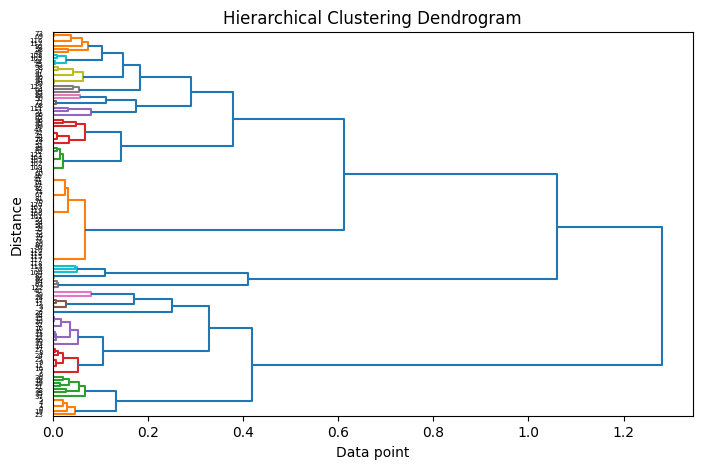

Number of Parameters: 5
Features by Cluster:
{1: ['l2_subp0_read_tex_sector_queries (dev_approximate_gravity)',
     'l2_subp1_read_tex_sector_queries (dev_approximate_gravity)',
     'l2_subp0_read_tex_hit_sectors (dev_approximate_gravity)',
     'l2_subp1_read_tex_hit_sectors (dev_approximate_gravity)',
     'inst_per_warp (dev_approximate_gravity)',
     'local_load_transactions (dev_approximate_gravity)',
     'gld_transactions (dev_approximate_gravity)',
     'l2_read_transactions (dev_approximate_gravity)',
     'l2_tex_read_transactions (dev_approximate_gravity)',
     'global_load_requests (dev_approximate_gravity)',
     'local_load_requests (dev_approximate_gravity)',
     'global_store_requests (dev_approximate_gravity)',
     'local_store_requests (dev_approximate_gravity)'],
 2: ['l2_subp0_write_tex_sector_queries (dev_approximate_gravity)',
     'l2_subp1_write_tex_sector_queries (dev_approximate_gravity)',
     'l2_subp0_total_read_sector_queries (dev_approximate_gravity

In [9]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import pprint

# Sample DataFrame, replace this with your actual DataFrame
# df = pd.DataFrame({
#     'Metric1': [100, 200, 300, 400, 500],
#     'Metric2': [10, 20, 30, 40, 50],
#     'Metric3': [5, 10, 15, 20, 25],
#     'Metric4': [1, 1, 1, 1, 1]
# })

df_scaled = np.log1p(df[high_corr_features])  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

# Step 1: Compute the correlation matrix
SCC = df_normalized.corr(method='spearman').fillna(0).abs()  # Using absolute values for correlation strength

# # Step 1: Calculate the correlation matrix (SCC)
# SCC = df.corr(method='spearman')
print(SCC.shape)
# Step 2: Perform hierarchical clustering
dendroG = linkage(SCC, method='ward')

# Function to cut the dendrogram and return features with highest variance
def cut_dendrogram_and_variance(dendroG, num_params, _df):
    # Cut the dendrogram to get clusters
    cutDendro = fcluster(dendroG, num_params, criterion='maxclust')
    
    # Create a DataFrame with cluster labels
    clusters = pd.Series(cutDendro, index=SCC.columns)
    
    # Group features by their clusters
    grouped_features = {}
    for cluster in clusters.unique():
        grouped_features[cluster] = clusters[clusters == cluster].index.tolist()
    
    # Calculate variance for each group of features
    variance_dict = {}
    for cluster, features in grouped_features.items():
        # Select features and calculate their variance
        feature_data = _df[features]
        variance_value = feature_data.var().sum()  # Total variance of the group
        variance_dict[cluster] = variance_value
    
    # Plot dendrogram 
    dendrogram(dendroG, orientation="right",  color_threshold =0.1) 
    
    plt.title('Hierarchical Clustering Dendrogram') 
    plt.subplots_adjust(left=8, right=9, top=0.9, bottom=0.1)
    plt.xlabel('Data point') 
    plt.ylabel('Distance') 
    plt.show()

    
    return grouped_features, variance_dict

def select_high_variance_feature(dendroG, _df, num_params):
    # Cut the dendrogram to form clusters
    cutDendro = fcluster(dendroG, num_params, criterion='maxclust')
    
    # Map each column to its cluster label
    clusters = pd.Series(cutDendro, index=SCC.columns)
    
    # For each cluster, find the feature with the maximum variance
    selected_features = []
    for cluster in clusters.unique():
        # Get the features in this cluster
        cluster_features = clusters[clusters == cluster].index.tolist()
        
        # Calculate variance for each feature in the cluster
        variances = _df[cluster_features].var()
        
        # Select the feature with the highest variance
        selected_feature = variances.idxmax()
        selected_features.append(selected_feature)
    
    return selected_features

# Step 4: Define number of clusters and select features
# Step 3: Loop through the number of parameters and compute variance
for No_Param in [5]:  # For No. Param in [5, 10]
    selected_features = select_high_variance_feature(dendroG, df, No_Param)
    # Step 5: Display the selected features
    print("Selected features with highest variance from each cluster:")
    pprint.pprint(selected_features)
    features, variance = cut_dendrogram_and_variance(dendroG, No_Param,df_normalized)
    print(f"Number of Parameters: {No_Param}")
    print("Features by Cluster:")
    pprint.pprint(features)
    print("Variance by Cluster:", variance)
    print()  # New line for better readability


In [87]:
selected_features

['gld_transactions (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'inst_compute_ld_st (correct_particles)',
 'active_warps_pm (correct_particles)',
 'global_store_requests (correct_particles)']

In [40]:
sim_params + gpu_params

['N',
 'theta',
 'dt',
 'I',
 'profiling',
 'Name',
 'Compute Capability',
 'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
 'Total Cores',
 'Warp Size',
 'Max Threads Per Block',
 'Max Blocks Per SM',
 'Shared Memory Per Block (KB)',
 'Shared Memory Per SM (KB)',
 'Registers Per Block',
 'Registers Per SM',
 'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
 'Memory Bus Width (bits)',
 'Memory Bandwidth (GB/s)',
 'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
 'Half Precision FLOP/s',
 'Single Precision FLOP/s',
 'Double Precision FLOP/s',
 'Concurrent Kernels',
 'Threads Per Warp',
 'Global Memory Bandwidth (GB/s)',
 'Global Memory Size (MB)',
 'L2 Cache Size',
 'Memcpy Engines']

In [55]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Sample DataFrame, replace with your actual dataset
# df = pd.DataFrame({
#     'N': [1000, 2000, 3000, 4000, 5000],
#     'theta': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'dt': [0.01, 0.02, 0.03, 0.04, 0.05],
#     'exec_time_avg': [0.12, 0.15, 0.14, 0.20, 0.18],
#     # High-variance features identified from clustering
#     'Feature1': [10, 20, 30, 40, 50],
#     'Feature2': [5, 10, 15, 20, 25],
#     'Feature3': [100, 200, 300, 400, 500]
# })

# # Step 1: Define core input, target, and high-variance features
# input_features = ['N', 'theta', 'dt']
# target = 'exec_time_avg'
# high_variance_features = ['Feature1', 'Feature2', 'Feature3']  # Replace with your selected features

# # Combine inputs and high-variance features for training
# training_features = input_features + high_variance_features

# # Step 2: Split data into training and testing sets
# X = df[training_features]
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Train the Decision Tree model
# model = DecisionTreeRegressor(random_state=42)
# model.fit(X_train, y_train)

# # Step 4: Evaluate model using only input features for test predictions
# X_test_final = X_test[input_features]  # Restrict to input features only for querying
# y_pred = model.predict(X_test_final)

# # Calculate mean squared error for model performance
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error on Test Data: {mse:.4f}")


In [796]:
full

,N,theta,dt,I,exec_time_min,exec_time_max,exec_time_avg,profiling,Name,Compute Capability,...,ipc (predict_particles),issued_ipc (predict_particles),issue_slot_utilization (predict_particles),eligible_warps_per_cycle (predict_particles),dram_read_transactions (predict_particles),dram_write_transactions (predict_particles),dram_read_throughput (predict_particles),dram_write_throughput (predict_particles),dram_read_bytes (predict_particles),dram_write_bytes (predict_particles)
0,100,0.2,0.000063,2,0.001399,0.002646,0.001706,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.096272,0.103667,2.444988,0.097800,241.0,44.0,3.772248e+00,7.052382e+02,7712.0,1408.0
1,100,0.2,0.000625,2,0.001423,0.003095,0.001865,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.097004,0.101533,2.394636,0.095785,226.0,12.0,3.078302e+00,1.673725e+02,7232.0,384.0
2,100,0.2,0.006250,2,0.001414,0.002085,0.001593,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.097004,0.100569,2.371917,0.094877,241.0,40.0,4.025986e+00,6.842506e+02,7712.0,1280.0
3,100,0.2,0.062500,2,0.001411,0.001796,0.001536,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.091234,0.094812,2.236136,0.089246,226.0,31.0,3.731482e+00,5.241246e+02,7232.0,992.0
4,100,0.2,0.625000,2,0.001401,0.002373,0.001797,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.107937,0.153401,3.617945,0.144718,223.0,0.0,3.823888e+00,0.000000e+00,7136.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,10000000,0.8,6.250000,2,0.212446,0.238142,0.221251,True,NVIDIA GeForce RTX 4060 Ti,8.9,...,0.010000,0.010000,1.190000,2.230000,17512848.0,9942868.0,1.634729e+11,9.281124e+10,560411136.0,318171776.0
2096,10000000,0.8,62.500000,2,0.196829,0.231445,0.204113,True,NVIDIA GeForce RTX 4060 Ti,8.9,...,0.010000,0.010000,1.190000,2.230000,17501328.0,10007120.0,1.660184e+11,9.492800e+10,560042496.0,320227840.0
2097,10000000,0.8,625.000000,2,0.202983,0.216549,0.208629,True,NVIDIA GeForce RTX 4060 Ti,8.9,...,0.010000,0.010000,1.190000,2.230000,17502844.0,10052252.0,1.661889e+11,9.544576e+10,560091008.0,321672064.0
2098,10000000,0.8,6250.000000,2,0.199913,0.225421,0.205419,True,NVIDIA GeForce RTX 4060 Ti,8.9,...,0.010000,0.010000,1.170000,2.190000,17772284.0,9929972.0,1.685583e+11,9.417920e+10,568713088.0,317759104.0


In [25]:
sim_params + gpu_params


['N',
 'theta',
 'dt',
 'I',
 'profiling',
 'Name',
 'Compute Capability',
 'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
 'Total Cores',
 'Warp Size',
 'Max Threads Per Block',
 'Max Blocks Per SM',
 'Shared Memory Per Block (KB)',
 'Shared Memory Per SM (KB)',
 'Registers Per Block',
 'Registers Per SM',
 'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
 'Memory Bus Width (bits)',
 'Memory Bandwidth (GB/s)',
 'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
 'Half Precision FLOP/s',
 'Single Precision FLOP/s',
 'Double Precision FLOP/s',
 'Concurrent Kernels',
 'Threads Per Warp',
 'Global Memory Bandwidth (GB/s)',
 'Global Memory Size (MB)',
 'L2 Cache Size',
 'Memcpy Engines']

In [84]:
input_features = ["N","theta","dt","Multiprocessors (SMs)","Total Cores", "L2 Cache Size (KB)"]

In [ ]:
# from sklearn.model_selection import train_test_split

# X = full[input_features + selected_features]
# y = full['exec_time_avg']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### test 1: intermediate model (Dtree->Dtree)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data for intermediate model training
X = full[input_features]
y_high_variance = full[selected_features]

# Train an intermediate model for each high-variance feature
intermediate_model = DecisionTreeRegressor()  # Using Linear Regression as an example
intermediate_model.fit(X, y_high_variance)

DecisionTreeRegressor()

In [64]:
# Generate high-variance feature predictions from the intermediate model
predicted_high_variance = intermediate_model.predict(X)
predicted_high_variance_df = pd.DataFrame(predicted_high_variance, columns=selected_features)

# Combine core features with the predicted high-variance features for main model training
X_full = pd.concat([X, predicted_high_variance_df], axis=1)
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
main_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [65]:
# Predict high-variance features from the core input features in the test set
predicted_high_variance_test = intermediate_model.predict(X_test[input_features])
predicted_high_variance_test_df = pd.DataFrame(predicted_high_variance_test, columns=selected_features)

# Combine core inputs and predicted high-variance features for the final prediction
X_test_full = pd.concat([X_test[input_features].reset_index(drop=True), predicted_high_variance_test_df.reset_index(drop=True)], axis=1)

# Make final predictions
y_pred = main_model.predict(X_test_full)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


Mean Absolute Percentage Error (MAPE): 0.0822
,N,theta,dt,Multiprocessors (SMs),Total Cores,L2 Cache Size (KB),y_pred,y_test
1034,10000,0.7,0.625,28,3584,2304,0.0033866159999999,0.002144908
1176,1000000,0.7,62.5,28,3584,2304,0.0287078999999999,0.0295985
67,100,0.8,625.0,10,1280,1536,0.001668381,0.001595424
1330,1000,0.2,6.25e-05,40,5120,4096,0.001457379,0.001246047
650,100000,0.4,6.25e-05,46,5888,4096,0.006263454,0.006154214
1868,10000,0.6,6250.0,34,4352,32768,0.0017744059999999,0.001726912
986,10000,0.2,62.5,28,3584,2304,0.002578713,0.003373097
552,1000,0.8,0.00625,46,5888,4096,0.001158285,0.001084803
1427,10000,0.4,625.0,40,5120,4096,0.002052309,0.002205707
1668,10000000,0.7,6250.0,40,5120,4096,0.2463994999999999,0.2484208
1574,1000000,0.5,0.625,40,5120,4096,0.06446202,0.06271713
1317,100,0.7,625.0,40,5120,4096,0.001498461,0.001955128
494,1000,0.2,0.625,46,5888,4096,0.0011203069999999,0.0011994369999999
1978,1000000,0.3,6250.0,34,4352,32768,0.0523937,0.05198599
1760,1000,0.3,6.25e-05

### Test2: Direct model (sim + gpu, no high variance features)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data for intermediate model training
X_full = full[input_features]
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
main_model.fit(X_train, y_train)

# Make final predictions
y_pred = main_model.predict(X_test)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


Mean Absolute Percentage Error (MAPE): 0.0803
,N,theta,dt,Multiprocessors (SMs),Total Cores,L2 Cache Size (KB),y_pred,y_test
1034,10000,0.7,0.625,28,3584,2304,0.002713966,0.002144908
1176,1000000,0.7,62.5,28,3584,2304,0.02890779,0.0295985
67,100,0.8,625.0,10,1280,1536,0.001510023,0.001595424
1330,1000,0.2,6.25e-05,40,5120,4096,0.001363612,0.001246047
650,100000,0.4,6.25e-05,46,5888,4096,0.0062738889999999,0.006154214
1868,10000,0.6,6250.0,34,4352,32768,0.001990342,0.001726912
986,10000,0.2,62.5,28,3584,2304,0.002968502,0.003373097
552,1000,0.8,0.00625,46,5888,4096,0.0011086249999999,0.001084803
1427,10000,0.4,625.0,40,5120,4096,0.002602125,0.002205707
1668,10000000,0.7,6250.0,40,5120,4096,0.2463994999999999,0.2484208
1574,1000000,0.5,0.625,40,5120,4096,0.06323365,0.06271713
1317,100,0.7,625.0,40,5120,4096,0.001150584,0.001955128
494,1000,0.2,0.625,46,5888,4096,0.001208521,0.0011994369999999
1978,1000000,0.3,6250.0,34,4352,32768,0.05442895,0.05198599
1760,1000,0.3,6.25e-05,34,4352,32768

### Test3: Direct model (sim + gpu, no high variance features)

In [251]:
selected_features

['gld_transactions (dev_approximate_gravity)',
 'active_cycles (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'stall_constant_memory_dependency (dev_approximate_gravity)',
 'dram_write_bytes (dev_approximate_gravity)',
 'inst_compute_ld_st (correct_particles)',
 'thread_inst_executed (correct_particles)',
 'active_warps_pm (correct_particles)',
 'active_cycles_pm (cl_build_key_list)',
 'dram_write_bytes (correct_particles)',
 'l2_subp0_read_tex_hit_sectors (compute_leaf)',
 'thread_inst_executed (predict_particles)',
 'global_store_requests (correct_particles)',
 'sm_efficiency (predict_particles)',
 'thread_inst_executed (compute_leaf)']

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm


# Split data for intermediate model training
X_full = full[input_features]
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
# main_model = LinearRegression() # Linear Kernel
main_model.fit(X_train, y_train)

# Make final predictions
y_pred = main_model.predict(X_test)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


Mean Absolute Percentage Error (MAPE): 0.0803
,N,theta,dt,Multiprocessors (SMs),Total Cores,L2 Cache Size (KB),y_pred,y_test
1034,10000,0.7,0.625,28,3584,2304,0.002713966,0.002144908
1176,1000000,0.7,62.5,28,3584,2304,0.02890779,0.0295985
67,100,0.8,625.0,10,1280,1536,0.001510023,0.001595424
1330,1000,0.2,6.25e-05,40,5120,4096,0.001363612,0.001246047
650,100000,0.4,6.25e-05,46,5888,4096,0.0062738889999999,0.006154214
1868,10000,0.6,6250.0,34,4352,32768,0.001990342,0.001726912
986,10000,0.2,62.5,28,3584,2304,0.002968502,0.003373097
552,1000,0.8,0.00625,46,5888,4096,0.0011086249999999,0.001084803
1427,10000,0.4,625.0,40,5120,4096,0.002602125,0.002205707
1668,10000000,0.7,6250.0,40,5120,4096,0.2463994999999999,0.2484208
1574,1000000,0.5,0.625,40,5120,4096,0.06323365,0.06271713
1317,100,0.7,625.0,40,5120,4096,0.001150584,0.001955128
494,1000,0.2,0.625,46,5888,4096,0.001208521,0.0011994369999999
1978,1000000,0.3,6250.0,34,4352,32768,0.05442895,0.05198599
1760,1000,0.3,6.25e-05,34,4352,32768

### Test 4: Multitask learning output using min, max and avg

In [87]:
print(y_full.to_csv())

,exec_time_avg,exec_time_max,exec_time_min
0,0.001705814,0.00264621,0.00139904
1,0.001864933,0.00309491,0.00142288
2,0.001593259,0.00208497,0.00141407
3,0.0015356329999999,0.0017960099999999,0.0014109599999999
4,0.0017966739999999,0.0023732199999999,0.00140119
5,0.0015625239999999,0.00191617,0.0014379
6,0.001592471,0.00291014,0.00139594
7,0.0014683499999999,0.00152183,0.00143099
8,0.0015817149999999,0.00284099,0.0014068999999999
9,0.001569436,0.0023808499999999,0.00139499
10,0.0016750089999999,0.00227499,0.00141812
11,0.001661183,0.0023539,0.00138808
12,0.001612568,0.00236105,0.00139308
13,0.001593876,0.00230002,0.001405
14,0.001817299,0.00269294,0.0014178799999999
15,0.0016606819999999,0.0022518699999999,0.00144196
16,0.001668381,0.00230908,0.00137401
17,0.001565384,0.00217199,0.0014081
18,0.0015089989999999,0.0020241799999999,0.0014128599999999
19,0.001544784,0.00195002,0.00139189
20,0.001526473,0.0021459999999999,0.0014049999999999
21,0.001608681,0.00245189,0.0014212099999999
22,0.0

In [97]:
input_features

['N',
 'theta',
 'dt',
 'Multiprocessors (SMs)',
 'Total Cores',
 'L2 Cache Size (KB)']

In [129]:
gpu_params

['profiling',
 'Name',
 'Compute Capability',
 'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
 'Total Cores',
 'Warp Size',
 'Max Threads Per Block',
 'Max Blocks Per SM',
 'Shared Memory Per Block (KB)',
 'Shared Memory Per SM (KB)',
 'Registers Per Block',
 'Registers Per SM',
 'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
 'Memory Bus Width (bits)',
 'Memory Bandwidth (GB/s)',
 'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
 'Half Precision FLOP/s',
 'Single Precision FLOP/s',
 'Double Precision FLOP/s',
 'Concurrent Kernels',
 'Threads Per Warp',
 'Global Memory Bandwidth (GB/s)',
 'Global Memory Size (MB)',
 'L2 Cache Size',
 'Memcpy Engines']

Mean Absolute Percentage Error (MAPE) - exec_time_avg: 0.1239
Mean Absolute Percentage Error (MAPE) - exec_time_max: 0.2603
Mean Absolute Percentage Error (MAPE) - exec_time_min: 0.0701


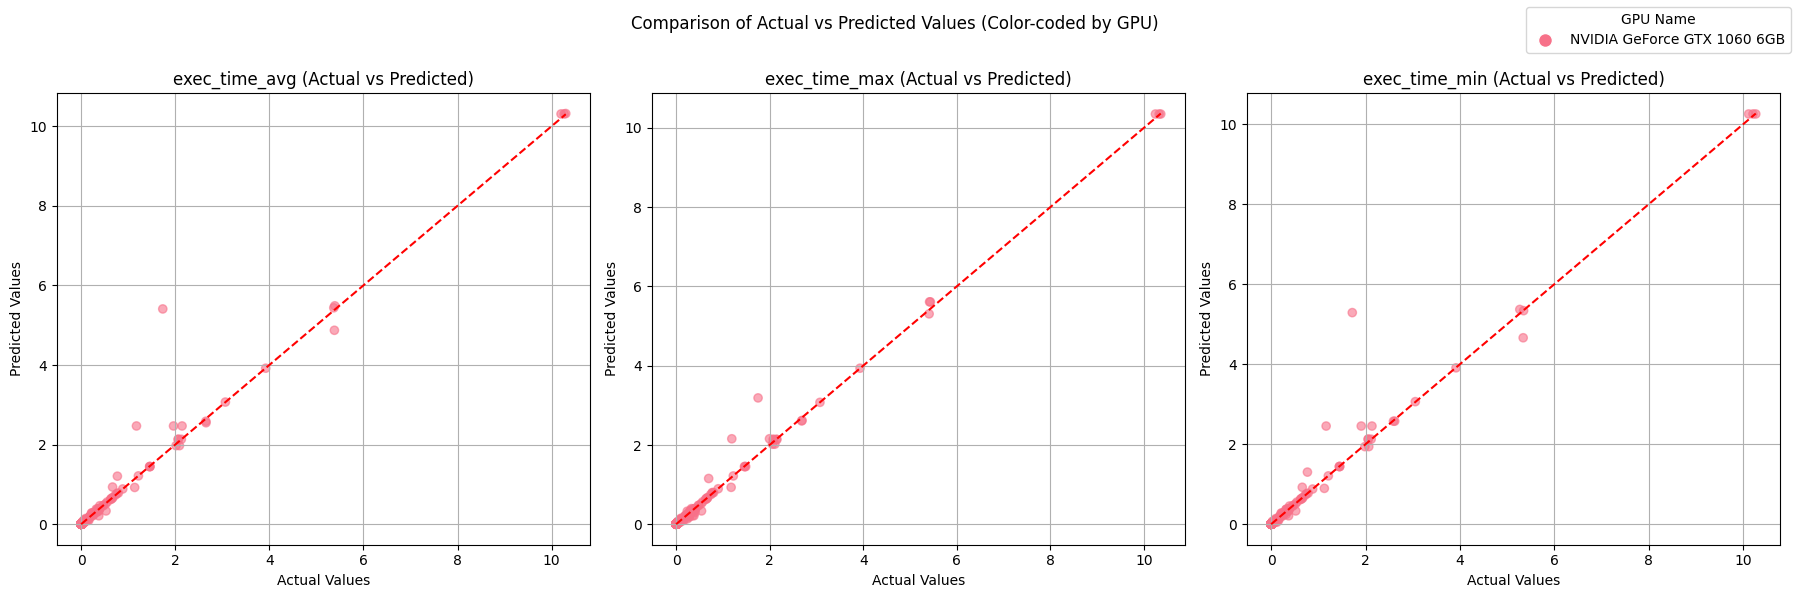

In [372]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# Define input and target variables
X_full = full[selected_features]

a= ['N','theta','dt',
#  'Compute Capability',
#  'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
#  'Total Cores',
#  'Warp Size',
#  'Max Threads Per Block',
#  'Max Blocks Per SM',
#  'Shared Memory Per Block (KB)',
#  'Shared Memory Per SM (KB)',
#  'Registers Per Block',
#  'Registers Per SM',
#  'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
#  'Memory Bus Width (bits)',
#  'Memory Bandwidth (GB/s)',
#  'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
#  'Half Precision FLOP/s',
#  'Single Precision FLOP/s',
#  'Double Precision FLOP/s',
#  'Concurrent Kernels',
#  'Threads Per Warp',
#  'Global Memory Bandwidth (GB/s)',
#  'Global Memory Size (MB)',
#  'L2 Cache Size',
#  'Memcpy Engines'
 ]

y_full = full[['exec_time_avg', 'exec_time_max', 'exec_time_min']]  # Multi-output target

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Train the main model with MultiOutputRegressor
base_model = DecisionTreeRegressor(random_state=42)
main_model = MultiOutputRegressor(base_model)
main_model.fit(X_train, y_train)

# Make predictions for each target (exec_time_avg, exec_time_max, exec_time_min)
y_pred = main_model.predict(X_test)

# Convert y_test and y_pred to DataFrames for easy comparison
y_test_df = pd.DataFrame(y_test, columns=['exec_time_avg', 'exec_time_max', 'exec_time_min']).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['exec_time_avg_pred', 'exec_time_max_pred', 'exec_time_min_pred'])

# Display the results alongside input features
results_df = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df], axis=1)

# Calculate MAPE for each output
mape_avg = mean_absolute_percentage_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg_pred'])
mape_max = mean_absolute_percentage_error(y_test_df['exec_time_max'], y_pred_df['exec_time_max_pred'])
mape_min = mean_absolute_percentage_error(y_test_df['exec_time_min'], y_pred_df['exec_time_min_pred'])

print(f"Mean Absolute Percentage Error (MAPE) - exec_time_avg: {mape_avg:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) - exec_time_max: {mape_max:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) - exec_time_min: {mape_min:.4f}")

# Export results to CSV (optional)
# print(results_df.to_csv(index=False))
plot_comp()


In [250]:
# N,theta,dt,Multiprocessors (SMs),Max Threads Per SM,L2 Cache Size (KB),Warps Per SM,Blocks Per SM,


main_model.predict([[1000000,0.2,6.25e-05,40,1024,4096,32,16]])

/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([[0.3282418, 0.344486 , 0.315496 ]])

In [22]:
df_scaled = np.log1p(full[input_features].apply(pd.to_numeric, errors='coerce'))  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

print(df_normalized.to_csv())

,N,theta,dt,Multiprocessors (SMs),Max Threads Per SM,L2 Cache Size (KB),Warps Per SM,Blocks Per SM,gld_transactions (dev_approximate_gravity),thread_inst_executed (dev_approximate_gravity),inst_compute_ld_st (correct_particles),active_warps_pm (correct_particles),global_store_requests (correct_particles)
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.1058828217425466,0.02062949766786004,0.0,0.01973710686023955,0.15371802893674577
1,0.0,0.0,5.092031782462215e-05,0.0,1.0,0.0,1.0,1.0,0.1058828217425466,0.02062954370501968,0.0,0.017196613247007164,0.15371802893674577
2,0.0,0.0,0.0005585548614051832,0.0,1.0,0.0,1.0,1.0,0.10590750069091348,0.020629559050732382,0.0,0.003049467932381922,0.15371802893674577
3,0.0,0.0,0.0054842712534793015,0.0,1.0,0.0,1.0,1.0,0.10443472043995716,0.019372357176230537,0.0,0.019627673653563327,0.15371802893674577
4,0.0,0.0,0.04396004689866098,0.0,1.0,0.0,1.0,1.0,0.10579018987339184,0.022099158809322672,0.0,0.020914924572514093,0.15371802893674577
5,0.0,0.0,0.1793861571617819,

In [180]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# input_features = [
#  'N',
#  'theta',
#  'dt',
#  'Multiprocessors (SMs)',
#  'Max Threads Per SM',
# #  'L2 Cache Size (KB)',
#  'Warps Per SM',
# #  'Blocks Per SM',

# #  'Compute Capability',
# #  'Total Memory (MB)',
# #  'Total Cores',
# #  'Warp Size',
# #  'Max Threads Per Block',
# #  'Max Blocks Per SM',
# #  'Shared Memory Per Block (KB)',
# #  'Shared Memory Per SM (KB)',
# #  'Registers Per Block',
# #  'Registers Per SM',
# #  'L1 Cache Size (KB)',
# #  'Memory Bus Width (bits)',
# #  'Memory Bandwidth (GB/s)',
# #  'Clock Rate (MHz)',
# #  'Half Precision FLOP/s',
# #  'Single Precision FLOP/s',
# #  'Double Precision FLOP/s',
# #  'Concurrent Kernels',
# #  'Threads Per Warp',
# #  'Global Memory Bandwidth (GB/s)',
# #  'Global Memory Size (MB)',
# #  'L2 Cache Size',
# #  'Memcpy Engines'
#  ] #+ selected_features
input_features = ['N', 'theta', 'Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']

# input_features = ['N', 'gld_transactions (dev_approximate_gravity)',
#  'thread_inst_executed (dev_approximate_gravity)',
#  'inst_compute_ld_st (correct_particles)',
#  'global_store_requests (correct_particles)']
# output_features = ['exec_time_avg', 'exec_time_max', 'exec_time_min']
output_features = ['exec_time_avg']

df_scaled = np.log1p(full[input_features].apply(pd.to_numeric, errors='coerce'))  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)


# Define input and target variables
# input_features = ['N', 'theta', 'dt', 'Multiprocessors (SMs)', 'Total Cores', 'L2 Cache Size (KB)']
# X_full = df_normalized[input_features]
sample_full = full #resample(full, n_samples=1000)
X_full = sample_full[input_features]
y_full = sample_full[output_features] # Multi-output target

# y_full = np.log10(full[['exec_time_avg', 'exec_time_max', 'exec_time_min']]) # Multi-output target
groups = sample_full['Name']  # Group by GPU name
# Apply square root transformation

# Initialize the model
# base_model = DecisionTreeRegressor(random_state=42) #,max_depth=15,max_features=1,max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2)
# Best MAPE Score: 0.3368 , 0.2495

# base_model = SVR(kernel='rbf', C=0.001, epsilon=0.000001)  # You can tune 'C' and 'epsilon' for performance


# base_model = LinearRegression()
base_model = RandomForestRegressor(random_state = 42, bootstrap=True,max_depth=10,max_features=1)
main_model = MultiOutputRegressor(base_model)
# main_model = base_model

# Setup GroupKFold
group_kfold = GroupKFold(n_splits=groups.nunique())  # Define the number of splits

# Cross-validation with grouped folds
scores = []
for fold, (train_index, test_index) in enumerate(group_kfold.split(X_full, y_full, groups=groups), start=1):
    
    X_train, X_test = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train, y_test = y_full.iloc[train_index], y_full.iloc[test_index]
    y_train_root = np.power(y_train,(1/1))

    # Fit the model on the training set
    main_model.fit(X_train, y_train_root)
    
    # Predict on the test set
    y_pred_root = main_model.predict(X_test)
    y_pred = np.power(y_pred_root,1)
    
    y_test_df = pd.DataFrame(y_test, columns=output_features)
    y_pred_df = pd.DataFrame(y_pred, columns=output_features)

    # print(y_test_df)
    fold_mape = mean_absolute_percentage_error(y_test,y_pred)
    mape_avg = mean_absolute_percentage_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg'])
    # mse_avg = mean_squared_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg'])
    # mae_avg = mean_absolute_error(y_test_df['exec_time_avg'], y_pred_df['exec_time_avg'])
    # mape_min = 0# mean_absolute_percentage_error(y_test_df['exec_time_min'], y_pred_df['exec_time_min'])
    # mape_max = 0# mean_absolute_percentage_error(y_test_df['exec_time_max'], y_pred_df['exec_time_max'])
    
    scores.append(fold_mape)
    
    # Print the GPU names in the test set and the MAPE for this fold
    test_gpus = groups.iloc[test_index].unique()
    print(f"Fold {fold}: Test GPUs = {test_gpus}")
    print(f"Fold {fold}: MAPE = avg: {mape_avg:.4f}")
    # plot_comp()

# Calculate the average MAPE across folds
average_mape = np.mean(scores)
# print(scores)
print(f"Cross-Validated Mean Absolute Percentage Error (MAPE): {average_mape:.4f}")


Fold 1: Test GPUs = ['NVIDIA GeForce RTX 4060 Ti']
Fold 1: MAPE = avg: 0.1811
Fold 2: Test GPUs = ['NVIDIA GeForce RTX 3070']
Fold 2: MAPE = avg: 0.2250
Fold 3: Test GPUs = ['NVIDIA GeForce RTX 3060']
Fold 3: MAPE = avg: 0.2298
Fold 4: Test GPUs = ['NVIDIA GeForce RTX 2070 SUPER']
Fold 4: MAPE = avg: 0.2515
Fold 5: Test GPUs = ['NVIDIA GeForce GTX 1060 6GB']
Fold 5: MAPE = avg: 0.3583
Cross-Validated Mean Absolute Percentage Error (MAPE): 0.2491


0       4.605170e+02
1       4.605170e+02
2       4.605170e+02
3       4.605170e+02
4       4.605170e+02
            ...     
2095    1.611810e+08
2096    1.611810e+08
2097    1.611810e+08
2098    1.611810e+08
2099    1.611810e+08
Name: N, Length: 2100, dtype: float64

In [643]:
input_features = ['N', 'theta', 'Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']
output_features = selected_features[0]

X_full = full[input_features]
# X_full['N_logN'] = full['N'] * np.log(full['N'])
y_full = np.power(full[output_features],1/2)

X_train, X_test, y_train, y_test, groups_train, groups_val = train_test_split(
    X_full, y_full, groups, test_size=0.2, random_state=42 #, stratify=groups
)

from sklearn.kernel_ridge import KernelRidge
# intermediate_model = KernelRidge(kernel='rbf', alpha=1.0)
from sklearn.ensemble import GradientBoostingRegressor
intermediate_model = GradientBoostingRegressor(max_depth=3,
                                n_estimators=1000,
                                learning_rate=0.1,
                                random_state=42)

intermediate_model.fit(X_train, y_train)
y_pred = intermediate_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")


Mean Absolute Percentage Error (MAPE): 0.2858


In [783]:
a = 1
b = []
for i in range(10):
    ins = [a*10**i,0.4,34,10396,5198,5198] 
    b.append(best_model.predict([ins])[0])
b

/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/home-server/.l

[array([0.51297061]),
 array([0.51297061]),
 array([0.51297061]),
 array([0.51619928]),
 array([0.54465784]),
 array([0.59623247]),
 array([0.73309735]),
 array([0.93561055]),
 array([0.93561055]),
 array([0.93561055])]

In [784]:
y_transformed

array([[-5.19933758],
       [-5.19933758],
       [-5.19933758],
       ...,
       [ 5.19933758],
       [ 5.19933758],
       [ 5.19933758]])

/tmp/ipykernel_3989848/2316173729.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed)


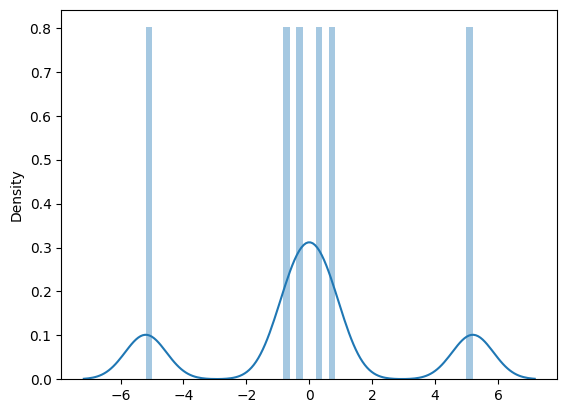

In [775]:
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal', random_state=42)
y_transformed = transformer.fit_transform(full[['N']])

# y_transformed = np.power(full[output_features],1/10)
# y_transformed, lam = boxcox(full[output_features] + 0.1) 

sns.distplot(y_transformed)

plt.show()

In [765]:
y_transformed.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [815]:
f_full

,N,theta,dt,I,exec_time_min,exec_time_max,exec_time_avg,profiling,Name,Compute Capability,...,ipc (predict_particles),issued_ipc (predict_particles),issue_slot_utilization (predict_particles),eligible_warps_per_cycle (predict_particles),dram_read_transactions (predict_particles),dram_write_transactions (predict_particles),dram_read_throughput (predict_particles),dram_write_throughput (predict_particles),dram_read_bytes (predict_particles),dram_write_bytes (predict_particles)
353,10000000,0.2,0.0625,2,10.24620,10.38550,10.318240,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.151752,0.152464,3.587612,0.150302,17702690.0,9996015.0,9.610132e+01,5.426465e+01,566486080.0,319872480.0
773,10000000,0.2,0.0625,2,3.06713,3.07621,3.073482,True,NVIDIA GeForce RTX 3070,8.6,...,0.020000,0.020000,2.150000,5.370000,17501428.0,10046964.0,2.647159e+11,1.519642e+11,560045696.0,321502848.0
1193,10000000,0.2,0.0625,2,5.34884,5.43554,5.391822,True,NVIDIA GeForce RTX 3060,8.6,...,0.030000,0.030000,3.200000,4.940000,17500700.0,10148916.0,2.102161e+11,1.219074e+11,560022400.0,324765312.0
1613,10000000,0.2,0.0625,2,5.33900,5.61014,5.486965,True,NVIDIA GeForce RTX 2070 SUPER,7.5,...,0.020000,0.020000,2.290000,4.470000,17543443.0,10062582.0,2.635615e+11,1.511738e+11,561390176.0,322002624.0
2033,10000000,0.2,0.0625,2,2.92987,2.98155,2.947249,True,NVIDIA GeForce RTX 4060 Ti,8.9,...,0.010000,0.010000,1.190000,2.220000,17502144.0,10033776.0,1.664351e+11,9.541529e+10,560068608.0,321080832.0


In [ ]:
Total Memory (MB),Multiprocessors (SMs),Max Threads Per SM,Total Cores,Warp Size,Max Threads Per Block,Max Blocks Per SM,Shared Memory Per Block (KB),Shared Memory Per SM (KB),Registers Per Block,Registers Per SM,L1 Cache Size (KB),L2 Cache Size (KB),Memory Bus Width (bits),Memory Bandwidth (GB/s),Clock Rate (MHz),Warps Per SM,Blocks Per SM,Half Precision FLOP/s,Single Precision FLOP/s,Double Precision FLOP/s,Concurrent Kernels,Threads Per Warp,Global Memory Bandwidth (GB/s),Global Memory Size (MB),L2 Cache Size,Memcpy Engines

In [903]:
Clock Rate (MHz)
L2 Cache Size (KB)

SyntaxError: invalid syntax (3896359200.py, line 1)

In [960]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Sample data creation - replace this with your actual DataFrame
data = {
    'N': [100, 200, 300, 400, 100, 200, 300, 400, 100, 200, 300, 400],
    'dt': [0.0625, 0.0625, 0.0625, 0.0625, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2],
    'theta': [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9],
    'Name': ['NVIDIA RTX 2070 SUPER'] * 4 + ['NVIDIA RTX 3070'] * 4 + ['NVIDIA RTX 3080'] * 4,
    'exec_time_avg': [1.2, 2.3, 3.4, 4.5, 1.5, 2.6, 3.7, 4.8, 1.0, 2.1, 3.2, 4.3]
}
df = pd.DataFrame(data)

# Specify the formula for Hierarchical Linear Model
# We include random intercepts for `dt`, `theta`, and `Name`
model = smf.mixedlm("exec_time_avg ~ N", df, groups=df["Name"])

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())
print("Model 1 AIC:", result.aic)


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: exec_time_avg
No. Observations: 12      Method:             REML         
No. Groups:       3       Scale:              0.0000       
Min. group size:  4       Log-Likelihood:     88.3965      
Max. group size:  4       Converged:          Yes          
Mean group size:  4.0                                      
-----------------------------------------------------------
             Coef. Std.Err.      z      P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept    0.133    0.065       2.052 0.040  0.006  0.261
N            0.011    0.000 2676366.626 0.000  0.011  0.011
Group Var    0.013 3978.690                                

Model 1 AIC: nan


In [976]:
full.query('Name == "NVIDIA GeForce RTX 2070 SUPER"')['L2 Cache Size (KB)']

1260    4096
1261    4096
1262    4096
1263    4096
1264    4096
        ... 
1675    4096
1676    4096
1677    4096
1678    4096
1679    4096
Name: L2 Cache Size (KB), Length: 420, dtype: int64

In [996]:
full['Clock Rate (MHz)']

0       1771
1       1771
2       1771
3       1771
4       1771
        ... 
2095    2565
2096    2565
2097    2565
2098    2565
2099    2565
Name: Clock Rate (MHz), Length: 2100, dtype: int64

In [999]:
full.query("`Clock Rate (MHz)` == 1785")['L2 Cache Size (KB)']

1260    4096
1261    4096
1262    4096
1263    4096
1264    4096
        ... 
1675    4096
1676    4096
1677    4096
1678    4096
1679    4096
Name: L2 Cache Size (KB), Length: 420, dtype: int64

In [ ]:
N=100000, dt=0.0625

<Axes: xlabel='theta'>

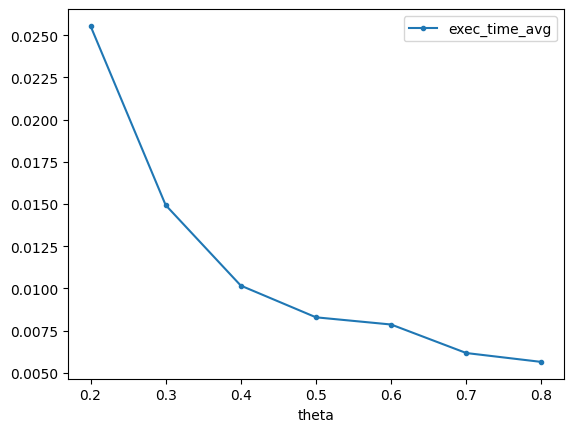

In [1199]:
full.query('dt == 0.0625 and N==100000 and `Clock Rate (MHz)` == 1785 and `L2 Cache Size (KB)` == 4096').plot(x='theta', y='exec_time_avg', marker='.')

In [1134]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
# Replace with your actual dataset
data = full

# pd.DataFrame({
#     'N': [...],
#     'dt': [...],
#     'theta': [...],
#     'Name': [...],
#     'exec_time_avg': [...]
# })

# Get unique combinations of dt, theta, and Name
combinations = data[['dt', 'theta', 'Clock Rate (MHz)','L2 Cache Size (KB)']].drop_duplicates()
models = {}

for _, row in combinations.iterrows():
    dt_val = row['dt']
    theta_val = row['theta']
    clock_rate_val = row['Clock Rate (MHz)']
    L2_cache_val = row['L2 Cache Size (KB)']
    # name_val = row['Name']

    # Filter the dataset based on the fixed combination
    subset = data.query('dt == @dt_val and theta == @theta_val and `Clock Rate (MHz)` == @clock_rate_val and `L2 Cache Size (KB)` == @L2_cache_val')

    # Fit a linear regression model for this subset
    if len(subset) > 1:  # Make sure there's enough data to fit
        model = ElasticNet()
        X = subset[['N']]
        y = subset['exec_time_avg']
        model.fit(X, y)

        # Store the model with a key identifying the fixed values
        models[(dt_val, theta_val, clock_rate_val,L2_cache_val)] = model


In [1138]:
def predict_exec_time_avg(N, dt, theta, clock_rate, L2_cache):
    # Find the corresponding model for the given dt, theta, and Name
    model_key = (dt, theta, clock_rate, L2_cache)
    model = models.get(model_key)
    
    if model:
        # Predict using the stored model for this combination
        return model.predict([[N]])[0]
    else:
        print("No model found for this combination.")
        return None

# Example usage
predicted_time = predict_exec_time_avg(N=100, dt=0.0625, theta=0.8, clock_rate= 1785, L2_cache = 4096)
print(f"Predicted execution time: {predicted_time}")

Predicted execution time: 0.0021545055053916753


/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [1139]:
full.query('N==100 and dt == 0.0625 and theta==0.8 and `Clock Rate (MHz)` == 1785 and `L2 Cache Size (KB)` == 4096')["exec_time_avg"]

1323    0.001336
Name: exec_time_avg, dtype: float64

In [1190]:
import numpy as np
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression

# Sample data
# Replace with your actual dataset
data = full

# Get unique combinations of dt, theta, Clock Rate, and L2 Cache Size
combinations = data[['dt', 'theta', 'Clock Rate (MHz)', 'L2 Cache Size (KB)']].drop_duplicates()
models = {}
combination_keys = []

# Fit linear models for each unique combination of (dt, theta, Clock Rate, L2 Cache Size)
for _, row in combinations.iterrows():
    dt_val = row['dt']
    theta_val = row['theta']
    clock_rate_val = row['Clock Rate (MHz)']
    L2_cache_val = row['L2 Cache Size (KB)']

    # Filter the dataset based on the fixed combination
    subset = data.query('dt == @dt_val and theta == @theta_val and `Clock Rate (MHz)` == @clock_rate_val and `L2 Cache Size (KB)` == @L2_cache_val')

    # Fit a linear regression model for this subset
    if len(subset) > 1:  # Ensure there's enough data to fit
        # model = ElasticNet()
        model =  make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

        X = subset[['N']]
        y = subset['exec_time_avg']
        model.fit(X, y)

        # Store the model and corresponding feature combination for interpolation
        models[(dt_val, theta_val, clock_rate_val, L2_cache_val)] = model
        combination_keys.append((dt_val, theta_val, clock_rate_val, L2_cache_val))

# # Save models to disk (optional) using joblib or pickle
# import joblib
# joblib.dump(models, 'saved_models.pkl')


In [1208]:

# # Load the saved models
# models = joblib.load('saved_models.pkl')

def query_prediction(N, dt, theta, clock_rate, L2_cache):
    # Find the closest match to the requested combination
    combination_key = (dt, theta, clock_rate, L2_cache)
    # If the combination exists in the saved models
    if combination_key in models:
        model = models[combination_key]
        return model.predict([[N]])[0]  # Predict using the model for this combination
    else:
        print("Combination not found. Using interpolation.")
        
        # Perform interpolation using griddata if no exact match is found
        combination_keys = np.array(list(models.keys()))  # Get known combinations
        known_predictions = []
        
        # Get predictions for all known combinations
        for comb_key in combination_keys:
            model = models[tuple(comb_key)]
            known_predictions.append(model.predict([[N]])[0])
        
        print(combination_keys)
        # Interpolate predictions for the new combination
        interpolated_value = griddata(combination_keys, known_predictions, np.array([[dt, theta, clock_rate,L2_cache]]), method='linear')
        print(interpolated_value)
        return interpolated_value[0] if interpolated_value.size > 0 else None

# Example usage
predicted_time = query_prediction(N=10000000, dt=0.0625, theta=0.8, clock_rate= 1785, L2_cache = 4096)
print(f"Predicted execution time: {predicted_time}")

Combination not found. Using interpolation.
[[6.2500e-05 2.0000e-01 1.7710e+03 1.5360e+03]
 [6.2500e-04 2.0000e-01 1.7710e+03 1.5360e+03]
 [6.2500e-03 2.0000e-01 1.7710e+03 1.5360e+03]
 ...
 [6.2500e+02 8.0000e-01 2.5650e+03 3.2768e+04]
 [6.2500e+03 8.0000e-01 2.5650e+03 3.2768e+04]
 [6.2500e+04 8.0000e-01 2.5650e+03 3.2768e+04]]
[nan]
Predicted execution time: nan


/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/home-server/.local/

In [1204]:
full.query('N==10000000 and dt == 0.0625 and theta==0.2 and `Clock Rate (MHz)` == 1785 and `L2 Cache Size (KB)` == 4096')["exec_time_avg"]

1613    5.486965
Name: exec_time_avg, dtype: float64

In [842]:
print(full['Multiprocessors (SMs)'])

0       10
1       10
2       10
3       10
4       10
        ..
2095    34
2096    34
2097    34
2098    34
2099    34
Name: Multiprocessors (SMs), Length: 2100, dtype: int64


## CV tree and svr

In [1213]:
from sklearn.model_selection import GroupKFold, train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor


from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Define input and target variables
input_features = ['N', 'theta', 'Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 
                  'Double Precision FLOP/s']

# input_features = ['N', 'theta','dt', 'Clock Rate (MHz)', 'L2 Cache Size (KB)','Multiprocessors (SMs)','Half Precision FLOP/s', 'Single Precision FLOP/s', 'Double Precision FLOP/s']

output_features = ['exec_time_avg']
grouping_feature = 'Name'

f_full = full
# output_features = selected_features
# X_full = pd.concat([full[input_features], np.power(full[selected_features[0]],1/10)], axis=1) 
X_full = f_full[input_features]

# X_full = pd.concat([full[input_features], pd.DataFrame(intermediate_model.predict(full[input_features]),columns=[selected_features[0]])], axis=1) 
# y_full = np.power(full[output_features],1/10)
y_full = f_full[output_features]
groups = f_full[grouping_feature]  # Group by GPU name

# Step 1: Split data into training and validation sets
X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
    X_full, y_full, groups, test_size=0.2, random_state=42, stratify=groups
)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Step 2: Initialize the base model and define the parameter grid
base_model_rf = RandomForestRegressor(random_state=42)
base_model_svr = SVR()
base_model_poly = Pipeline([
                    ('poly', PolynomialFeatures()),   # PolynomialFeatures step
                    ('ridge', Ridge())                # Ridge regression step
                ])
base_model_krr = KernelRidge()
base_model_gb = GradientBoostingRegressor(random_state=42)
base_model_elasticnet = ElasticNet(random_state=42)
base_model_mlp = MLPRegressor(random_state=42)

param_distributions_rf = {
    'estimator__n_estimators': [1,5,10,25,50, 100, 200],
    'estimator__max_depth': [2,5,10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1,2, 4,6],
    'estimator__max_features': [1, 'sqrt', 'log2']
}

param_distributions_svr = {
    'estimator__C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'estimator__epsilon': [0.0001, 0.001, 0.01, 0.1, 0.5],  # Margin of error
    'estimator__kernel': ['rbf'],  # Kernel types
    #'estimator__degree': [2, 3, 4],  # Only for 'poly' kernel
    'estimator__gamma': ['scale', 'auto'],  # Kernel coefficient
}

param_distributions_poly = {
    'poly__degree': [2, 3, 4, 5],                  # Degree of polynomial features
    'ridge__alpha': [0.1, 1, 10, 100, 1000],       # Regularization parameter for Ridge
    'ridge__fit_intercept': [True, False],         # Whether to fit the intercept term
    'ridge__normalize': [True, False],             # Normalize inputs
}

param_distributions_krr = {
    'estimator__alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength
    'estimator__kernel': ['rbf', ],  # Kernel types
    # 'estimator__degree': [2, 3, 4],  # Degree of polynomial kernel (only used if kernel='polynomial')
    'estimator__gamma': [0.01,0.1,1,None],  # Kernel coefficient for 'rbf' and 'sigmoid'
}

param_distributions_gb = {
    'estimator__n_estimators': [50, 100, 200, 500],  # Number of boosting stages
    'estimator__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'estimator__max_depth': [3, 5, 7, 10],  # Maximum depth of each estimator
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum samples required in leaf nodes
    'estimator__subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per estimator
    'estimator__max_features': [1, 'sqrt', 'log2']  # Number of features to consider at each split
}

param_distributions_elasticnet = {
    'estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'estimator__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0,],  # Mix between L1 and L2 (lasso and ridge)
    'estimator__fit_intercept': [True, False],  # Whether to calculate the intercept
    'estimator__max_iter': [100000],  # Whether to calculate the intercept
}

param_distributions_mlp = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100, 50)],  # Different hidden layer configurations
    'estimator__activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'estimator__solver': ['adam', 'sgd'],  # Optimization algorithms
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization term
    'estimator__learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'estimator__learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'estimator__max_iter': [200, 300, 500]  # Number of epochs
}

base_model = base_model_rf
param_distributions = param_distributions_rf
#{'model__estimator__max_depth': [None], 'model__estimator__max_features': [1], 'model__estimator__min_samples_leaf': [1], 'model__estimator__min_samples_split': [2], 'model__estimator__n_estimators': [10]}
 #param_distributions_gb

# Step 3: Set up MultiOutputRegressor with RandomizedSearchCV on training set
main_model = MultiOutputRegressor(base_model)
# int_mod = Pipeline([
#     ('quantile_transform', quantile_transformer),  # Step to transform target
#     ('model', base_model)
# ])

# main_model = TransformedTargetRegressor(
#     # regressor=MultiOutputRegressor(base_model),
#     regressor=int_mod,
#     transformer=quantile_transformer
# )


group_kfold = GroupKFold(n_splits=min(5, groups_train.nunique()))  # Number of splits limited to unique group count

random_search = GridSearchCV(
    estimator=main_model,
    param_grid=param_distributions,
    # n_iter=100,  # Adjust based on computational resources
    cv=group_kfold.split(X_train, y_train, groups=groups_train),
    scoring='neg_mean_absolute_percentage_error',
    # random_state=42,
    n_jobs=-1
)

# Step 4: Fit the RandomizedSearchCV on the training data only
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MAPE score
best_mape = -random_search.best_score_  # Convert to positive MAPE
print(f"Best MAPE Score: {best_mape:.4f}")
print("Best Parameters:", random_search.best_params_)


# Step 5: Use the best parameters to fit a final model and evaluate on validation set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
# Store the MAPE scores for each fold along with group names
fold_scores = []
group_names = []

# Loop through each fold, get the groups and MAPE score
for train_index, test_index in group_kfold.split(X_train, y_train, groups=groups_train):
    # Get group names for the test set in this fold
    test_group_names = groups_train.iloc[test_index].unique()
    group_names.append(test_group_names)

    # Train on the best model and compute the score for this fold
    best_model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_pred = best_model.predict(X_train.iloc[test_index])
    fold_mape = mean_absolute_percentage_error(y_train.iloc[test_index], y_pred)

    # Store the score
    fold_scores.append(fold_mape)

# Print results with group names
for fold_idx, (score, group) in enumerate(zip(fold_scores, group_names), start=1):
    print(f"Fold {fold_idx} (Groups: {group}): MAPE = {score:.4f}")

# Calculate and print the mean MAPE across all folds
mean_mape = np.mean(fold_scores)
print(f"Mean MAPE across all folds: {mean_mape:.4f}")


X_val_truth = X_val
# X_val_truth = pd.concat([X_val[input_features].reset_index(drop=True), pd.DataFrame(intermediate_model.predict(X_val[input_features]),columns=[selected_features[0]]).reset_index(drop=True)],axis=1)

y_val_pred = best_model.predict(X_val_truth)

# Calculate and display the MAPE for the validation set
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Final Validation MAPE with Best Parameters: {mape_val:.4f}")
# print("Best Parameters from Randomized Search:", random_search.best_params_)


Best MAPE Score: 0.2443
Best Parameters: {'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 50}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.1906
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.2277
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.2205
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2403
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3426
Mean MAPE across all folds: 0.2443
Final Validation MAPE with Best Parameters: 0.2069


Best MAPE Score: 0.2505
Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 1, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 25}
Fold 1 (Groups: ['NVIDIA GeForce RTX 4060 Ti']): MAPE = 0.2014
Fold 2 (Groups: ['NVIDIA GeForce RTX 3070']): MAPE = 0.2097
Fold 3 (Groups: ['NVIDIA GeForce RTX 3060']): MAPE = 0.2040
Fold 4 (Groups: ['NVIDIA GeForce RTX 2070 SUPER']): MAPE = 0.2561
Fold 5 (Groups: ['NVIDIA GeForce GTX 1060 6GB']): MAPE = 0.3814
Mean MAPE across all folds: 0.2505
Final Validation MAPE with Best Parameters: 0.2122


In [779]:
y_train, y_val_pred

(      exec_time_avg
 2071       0.907202
 1902       0.622024
 1036       0.528893
 1491       0.635642
 477        0.498847
 ...             ...
 480        0.498681
 213        0.725761
 661        0.589889
 94         0.530167
 1573       0.758743
 
 [1680 rows x 1 columns],
 array([[0.89390578],
        [0.61386418],
        [0.54969342],
        ...,
        [0.58582436],
        [0.51333765],
        [0.74325156]]))

In [770]:
y_val_pred

array([[0.51619928],
       [0.59623247],
       [0.6748402 ],
       [0.51358678],
       [0.73485185],
       [0.51435319],
       [0.57325999],
       [0.51424669],
       [0.76507608],
       [0.89390578],
       [0.56105812],
       [0.67436465],
       [0.52150739],
       [0.59600584],
       [0.50415919],
       [0.93561055],
       [0.52255237],
       [0.64387366],
       [0.87362033],
       [0.50692003],
       [0.67436465],
       [0.52150739],
       [0.55897849],
       [0.4990139 ],
       [0.58362238],
       [0.74460598],
       [0.97928295],
       [0.89598781],
       [0.57002987],
       [0.74460598],
       [0.51118492],
       [0.89598781],
       [0.86246771],
       [0.52048401],
       [0.53963555],
       [0.56524728],
       [0.7093324 ],
       [0.64387366],
       [0.50264982],
       [0.54086996],
       [0.56221271],
       [0.71306021],
       [0.55262288],
       [0.50796436],
       [0.50692154],
       [0.54537923],
       [0.64437259],
       [0.519

gb
Best MAPE Score: 0.2448
Best Parameters: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 10, 'estimator__max_features': 1, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50, 'estimator__subsample': 0.8}
Validation MAPE with Best Parameters: 0.1623
Best Parameters from Randomized Search: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 10, 'estimator__max_features': 1, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50, 'estimator__subsample': 0.8}


In [478]:
X_val_truth = pd.concat([X_val[input_features].reset_index(drop=True), pd.DataFrame(intermediate_model.predict(X_val[input_features]),columns=[selected_features[0]]).reset_index(drop=True)],axis=1)
X_val_truth

,N,theta,Multiprocessors (SMs),Half Precision FLOP/s,Single Precision FLOP/s,Double Precision FLOP/s,gld_transactions (dev_approximate_gravity)
0,1000,0.4,34,10396,5198,5198,3.112663
1,100000,0.4,34,10396,5198,5198,5.415662
2,1000000,0.8,34,10396,5198,5198,6.423400
3,100,0.7,34,10396,5198,5198,2.513135
4,1000000,0.6,10,2111,1055,1055,7.219777
...,...,...,...,...,...,...,...
415,10000,0.4,10,2111,1055,1055,4.456757
416,10000,0.8,28,5931,2965,2965,3.888070
417,10000000,0.3,10,2111,1055,1055,9.730706
418,10000,0.7,28,5931,2965,2965,3.960482


In [782]:
ins = [10000000,0.4,34,10396,5198,5198] 
best_model.predict([ins])
# best_model.predict([ins + [intermediate_model.predict([ins])[0]]])

/home/home-server/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


array([[0.93561055]])

In [ ]:
Best MAPE Score: 0.2470
Best Parameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}
Validation MAPE with Best Parameters: 0.1797

Best MAPE Score: 0.2767
Best Parameters: {'estimator__n_estimators': 1, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 20}
Validation MAPE with Best Parameters: 0.2053

In [194]:
y_full 

,exec_time_avg,exec_time_max,exec_time_min
0,0.001706,0.002646,0.001399
1,0.001865,0.003095,0.001423
2,0.001593,0.002085,0.001414
3,0.001536,0.001796,0.001411
4,0.001797,0.002373,0.001401
...,...,...,...
2095,0.221251,0.238142,0.212446
2096,0.204113,0.231445,0.196829
2097,0.208629,0.216549,0.202983
2098,0.205419,0.225421,0.199913


In [196]:
pd.concat([y_test_df,y_pred_df],axis=1)

,exec_time_avg,exec_time_max,exec_time_min,exec_time_avg,exec_time_max,exec_time_min
0,0.001706,0.002646,0.001399,0.000321,0.001287,0.000043
1,0.001865,0.003095,0.001423,0.000321,0.001287,0.000043
2,0.001593,0.002085,0.001414,0.000320,0.001286,0.000043
3,0.001536,0.001796,0.001411,0.000316,0.001276,0.000041
4,0.001797,0.002373,0.001401,0.000283,0.001199,0.000030
...,...,...,...,...,...,...
415,0.575875,0.595149,0.562516,0.176364,0.186948,0.161222
416,0.520846,0.539867,0.514006,0.172250,0.182120,0.157299
417,0.519926,0.526730,0.515809,0.167964,0.177096,0.153214
418,0.514423,0.520595,0.508384,0.163709,0.172116,0.149160


In [154]:
pd.concat([y_test_df,y_pred_df],axis=1)

,exec_time_avg,exec_time_max,exec_time_min,exec_time_avg,exec_time_max,exec_time_min
0,0.001706,0.002646,0.001399,0.001281,0.004351,0.001037
1,0.001865,0.003095,0.001423,0.001281,0.004351,0.001041
2,0.001593,0.002085,0.001414,0.001281,0.003849,0.001041
3,0.001536,0.001796,0.001411,0.001281,0.004351,0.001034
4,0.001797,0.002373,0.001401,0.001494,0.004351,0.001081
...,...,...,...,...,...,...
415,0.575875,0.595149,0.562516,0.326648,0.416887,0.397811
416,0.520846,0.539867,0.514006,0.373045,0.355354,0.317149
417,0.519926,0.526730,0.515809,0.373045,0.355354,0.317149
418,0.514423,0.520595,0.508384,0.373045,0.355354,0.317149


In [357]:
print(full[["Name"]+ input_features].to_csv())

,Name,N,theta,dt,gld_transactions (dev_approximate_gravity),thread_inst_executed (dev_approximate_gravity),inst_compute_ld_st (correct_particles),active_warps_pm (correct_particles),global_store_requests (correct_particles)
0,NVIDIA GeForce GTX 1060 6GB,100,0.2,6.25e-05,41018.0,8692602.0,1700.0,18426.0,201.0
1,NVIDIA GeForce GTX 1060 6GB,100,0.2,0.000625,41018.0,8692608.0,1700.0,17742.0,201.0
2,NVIDIA GeForce GTX 1060 6GB,100,0.2,0.00625,41034.0,8692610.0,1700.0,14372.0,201.0
3,NVIDIA GeForce GTX 1060 6GB,100,0.2,0.0625,40090.0,8530294.0,1700.0,18396.0,201.0
4,NVIDIA GeForce GTX 1060 6GB,100,0.2,0.625,40958.0,8886268.0,1700.0,18752.0,201.0
5,NVIDIA GeForce GTX 1060 6GB,100,0.2,6.25,52482.0,10811794.0,1700.0,13908.0,201.0
6,NVIDIA GeForce GTX 1060 6GB,100,0.2,62.5,46254.0,10893152.0,1700.0,18792.0,201.0
7,NVIDIA GeForce GTX 1060 6GB,100,0.2,625.0,58390.0,11468086.0,1700.0,19052.0,201.0
8,NVIDIA GeForce GTX 1060 6GB,100,0.2,6250.0,62806.0,12087698.0,1700.0,18628.0,201.0
9,NVIDIA GeForce 

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comp():
    # Convert y_test and y_pred to DataFrames for easy plotting
    y_test_df = pd.DataFrame(y_test, columns=['exec_time_avg', 'exec_time_max', 'exec_time_min']).reset_index(drop=True)
    y_pred_df = pd.DataFrame(y_pred, columns=['exec_time_avg_pred', 'exec_time_max_pred', 'exec_time_min_pred'])

    # Reset index for test groups to match with y_test
    test_groups = groups.iloc[test_index].reset_index(drop=True)

    # Generate color mapping for each unique GPU name
    unique_gpus = test_groups.unique()
    palette = sns.color_palette("husl", len(unique_gpus))
    color_map = dict(zip(unique_gpus, palette))

    # Map colors for each GPU in the test set
    colors = test_groups.map(color_map)

    # Plot comparisons for each target variable
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Comparison of Actual vs Predicted Values (Color-coded by GPU)")

    target_names = ['exec_time_avg', 'exec_time_max', 'exec_time_min']
    for i, target in enumerate(target_names):
        scatter = axes[i].scatter(y_test_df[target], y_pred_df[f"{target}_pred"], c=colors, alpha=0.6)
        axes[i].plot([y_test_df[target].min(), y_test_df[target].max()],
                    [y_test_df[target].min(), y_test_df[target].max()], 'r--')  # Reference line
        axes[i].set_xlabel("Actual Values")
        axes[i].set_ylabel("Predicted Values")
        axes[i].set_title(f"{target} (Actual vs Predicted)")
        axes[i].grid(True)

    # Create a legend for GPU names
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[gpu], markersize=10) for gpu in unique_gpus]
    labels = unique_gpus
    fig.legend(handles, labels, title="GPU Name", loc="upper right")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


In [388]:
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import numpy as np

# Define the base model
base_model = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'estimator__max_depth': [5, 10, 15, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': [1.0, 'sqrt', 'log2'],
    'estimator__max_leaf_nodes': [None, 10, 20, 50]
}

# Define custom scorer for mean absolute percentage error
scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Setup GroupKFold
group_kfold = GroupKFold(n_splits=5)

# Create MultiOutputRegressor wrapped around the base DecisionTreeRegressor
multi_output_model = MultiOutputRegressor(base_model)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    multi_output_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=group_kfold.split(X_full, y_full, groups=groups),
    n_jobs=-1  # Parallelize over all cores
)

# Run grid search
grid_search.fit(X_full, y_full)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best MAPE Score: {-grid_search.best_score_:.4f}")

Best Parameters: {'estimator__max_depth': 15, 'estimator__max_features': 1.0, 'estimator__max_leaf_nodes': None, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 2}
Best MAPE Score: 0.3368


In [42]:
print(input_features)

['N', 'theta', 'dt', 'Multiprocessors (SMs)', 'Total Cores', 'L2 Cache Size (KB)']


In [28]:
print(full[input_features+selected_features].to_string())

             N  theta            dt  Multiprocessors (SMs)  Total Cores  L2 Cache Size (KB)  l2_read_transactions (dev_approximate_gravity)  thread_inst_executed (dev_approximate_gravity)  l2_tex_write_transactions (dev_approximate_gravity)  l2_global_load_bytes (dev_approximate_gravity)  stall_constant_memory_dependency (dev_approximate_gravity)  l2_local_load_bytes (dev_approximate_gravity)  dram_write_bytes (dev_approximate_gravity)  l2_global_load_bytes (predict_particles)  thread_inst_executed (correct_particles)  active_cycles (correct_particles)  active_warps_pm (correct_particles)  active_warps (cl_build_key_list)  dram_write_bytes (correct_particles)  l2_subp0_read_tex_hit_sectors (compute_leaf)  inst_misc (cl_build_key_list)
0          100    0.2      0.000063                     10         1280                1536                                    1.715400e+04                                    8.692602e+06                                         8.343000e+03               

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Custom transformer to add high-variance features during training only
class HighVarianceTransformer(TransformerMixin):
    def fit(self, X, y=None):
        # Fit only uses high-variance features
        self.mean_variance = X[selected_features].var(axis=1).mean()
        return self
    
    def transform(self, X):
        # Transform applies summary statistic based on high-variance features
        X_transformed = X.copy()
        X_transformed['high_variance_summary'] = self.mean_variance
        return X_transformed[input_features + ['high_variance_summary']]

# Build a pipeline that includes this transformer
model_pipeline = Pipeline([
    ('high_variance', HighVarianceTransformer()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train and evaluate the pipeline
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test[input_features])
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.4380


In [38]:
selected_features

['l2_read_transactions (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'l2_tex_write_transactions (dev_approximate_gravity)',
 'l2_global_load_bytes (dev_approximate_gravity)',
 'stall_constant_memory_dependency (dev_approximate_gravity)',
 'dram_read_bytes (dev_approximate_gravity)',
 'dram_write_bytes (dev_approximate_gravity)',
 'l2_global_load_bytes (predict_particles)',
 'thread_inst_executed (correct_particles)',
 'active_cycles (correct_particles)',
 'active_warps_pm (correct_particles)',
 'active_warps (cl_build_key_list)',
 'dram_write_bytes (correct_particles)',
 'l2_subp0_read_tex_hit_sectors (compute_leaf)',
 'inst_misc (cl_build_key_list)']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Stage 1: Train initial model with extended features
model_stage1 = DecisionTreeRegressor(random_state=42)
model_stage1.fit(X_train[input_features + selected_features], y_train)

# Predict training data to capture influence of high-variance features
y_train_stage2 = model_stage1.predict(X_train[input_features + selected_features])

# Stage 2: Train final model using core features only on predictions from Stage 1
model_stage2 = DecisionTreeRegressor()  # Or use another model if needed
model_stage2.fit(X_train[input_features], y_train_stage2)

# Predict with final model using core features
y_pred = model_stage2.predict(X_test[input_features])
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.0134


In [ ]:
model_stage1 = DecisionTreeRegressor(random_state=42)
model_stage1.fit(X_train[input_features], y_train)

# Predict with final model using core features
y_pred = model_stage1.predict(X_test[input_features])
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.0184


In [56]:
import pandas as pd

# Define the core input columns used for predictions
input_columns = X_test[input_features].reset_index(drop=True)

# Convert y_test and y_pred to pandas Series for easy concatenation
y_test_series = pd.Series(y_test, name='y_test').reset_index(drop=True)
y_pred_series = pd.Series(y_pred, name='y_pred').reset_index(drop=True)

# Combine input columns, y_test, and y_pred into one DataFrame
results_df = pd.concat([input_columns, y_test_series, y_pred_series], axis=1)

# Display the resulting DataFrame
print(results_df.to_string())

            N  theta            dt  Multiprocessors (SMs)  Total Cores  L2 Cache Size (KB)     y_test     y_pred
0        1000    0.2     62.500000                     10         1280                1536   0.001845   0.001759
1       10000    0.6     62.500000                     28         3584                2304   0.001893   0.001713
2         100    0.6      0.062500                     10         1280                1536   0.001589   0.001561
3      100000    0.5     62.500000                     46         5888                4096   0.004250   0.004581
4        1000    0.5  62500.000000                     46         5888                4096   0.001078   0.001114
5        1000    0.5      0.000625                     10         1280                1536   0.001838   0.001726
6         100    0.8   6250.000000                     28         3584                2304   0.000919   0.001088
7    10000000    0.5      6.250000                     28         3584                2304   0.5

In [132]:
# base_directory = "./Data_collect"
# current_run_directory = select_run_folder(base_directory,6)
# res2 = load_profiling_parameters_ncu(current_run_directory)
# # list(res.columns.values)
# print(res2.to_string())

TypeError: load_profiling_parameters_ncu() missing 3 required positional arguments: 'N', 'theta', and 'dt'

In [60]:

# print(ncu_2_nvprof(res2).to_string())

                            Device  Context  Stream                   Kernel Correlation_ID tex0_cache_sector_queries tex1_cache_sector_queries tex0_cache_sector_misses tex1_cache_sector_misses  fb_subp0_read_sectors  fb_subp1_read_sectors  fb_subp0_write_sectors  fb_subp1_write_sectors  l2_subp0_write_sector_misses  l2_subp1_write_sector_misses  l2_subp0_read_sector_misses  l2_subp1_read_sector_misses  l2_subp0_read_tex_sector_queries  l2_subp1_read_tex_sector_queries  l2_subp0_write_tex_sector_queries  l2_subp1_write_tex_sector_queries  l2_subp0_read_tex_hit_sectors  l2_subp1_read_tex_hit_sectors  l2_subp0_write_tex_hit_sectors  l2_subp1_write_tex_hit_sectors  l2_subp0_total_read_sector_queries  l2_subp1_total_read_sector_queries  l2_subp0_total_write_sector_queries  l2_subp1_total_write_sector_queries  l2_subp0_read_sysmem_sector_queries  l2_subp1_read_sysmem_sector_queries  l2_subp0_write_sysmem_sector_queries  l2_subp1_write_sysmem_sector_queries  elapsed_cycles_sm gld_inst_8bit g

In [131]:
profile_flatten(ncu_2_nvprof(res2))
profile_flatten(res)

r3 = pd.concat([res,ncu_2_nvprof(res2)])

# print(r3.to_string())

# branch_efficiency ?
# tex_cache_hit_rate ?
# sysmem_read_throughput?
# sysmem_write_throughput?
# local_load_throughput?  local_store_throughput? shared_store_throughput?
# gld_efficiency?
# gst_efficiency?
# flop_count_dp?  flop_count_dp_add ? flop_count_dp_fma ? flop_count_dp_mul? 
# inst_fp_64?  inst_bit_convert?  inst_control?  inst_compute_ld_st ?    inst_misc?
# sm_efficiency?
# dram_read_bytes?

filter_out = [
    "Device",
    "Context",
    "Stream",
    "Correlation_ID",
    "tex0_cache_sector_queries",
    "tex1_cache_sector_queries",
    "tex0_cache_sector_misses",
    "tex1_cache_sector_misses",
    "l2_subp0_write_sector_misses",
    "l2_subp1_write_sector_misses",
    "l2_subp0_read_sysmem_sector_queries",
    "l2_subp1_read_sysmem_sector_queries",
    "gld_inst_8bit",
    "gld_inst_16bit",
    "gld_inst_32bit",
    "gld_inst_64bit",
    "gld_inst_128bit",
    "gst_inst_8bit",
    "gst_inst_16bit",
    "gst_inst_32bit",
    "gst_inst_64bit",
    "gst_inst_128bit",
    "prof_trigger_00",
    "prof_trigger_01",
    "prof_trigger_02",
    "prof_trigger_03",
    "prof_trigger_04",
    "prof_trigger_05",
    "prof_trigger_06",
    "prof_trigger_07",
    "inst_issued2",
    "generic_load",
    "generic_store",
    "inst_executed_in_trap",
    "active_cycles_in_trap",
    "inst_executed_shared_atom_cas",
    "shared_atom",
    "global_atom_cas",
    "gred_count",
    "divergent_branch",
    "branch",
    "shared_ld_bank_conflict",
    "shared_st_bank_conflict",
    "inst_replay_overhead",
    "shared_load_transactions_per_request",
    "shared_store_transactions_per_request",
    "local_hit_rate",
    "gld_requested_throughput",
    "gst_requested_throughput",
    "local_memory_overhead",
    "tex_cache_throughput",
    "sysmem_utilization",
    "stall_sync",
    "stall_texture",
    "shared_efficiency",
    "cf_issued",
    "ldst_issued",
    "ldst_executed",
    "atomic_transactions_per_request",
    "flop_count_hp",
    "flop_count_hp_add",
    "flop_count_hp_mul",
    "flop_count_hp_fma",
    "inst_fp_16",
    "sysmem_read_utilization",
    "sysmem_write_utilization",
    "pcie_total_data_transmitted",
    "pcie_total_data_received",
    "inst_executed_surface_loads",
    "inst_executed_surface_stores",
    "inst_executed_global_atomics",
    "inst_executed_global_reductions",
    "inst_executed_surface_atomics",
    "inst_executed_surface_reductions",
    "inst_executed_shared_atomics",
    "inst_executed_tex_ops",
    "l2_surface_load_bytes",
    "l2_global_reduction_bytes",
    "l2_surface_store_bytes",
    "l2_surface_reduction_bytes",
    "l2_surface_atomic_store_bytes",
    "surface_load_requests",
    "surface_store_requests",
    "global_reduction_requests",
    "surface_atomic_requests",
    "surface_reduction_requests",
    "sysmem_read_bytes",
    "sysmem_write_bytes",
    "texture_load_requests",
    "unique_warps_launched",
    "tex_utilization",
    "l2_utilization",
    "shared_utilization",
    "ldst_fu_utilization",
    "cf_fu_utilization",
    "special_fu_utilization",
    "tex_fu_utilization",
    "single_precision_fu_utilization",
    "double_precision_fu_utilization",
    "dram_utilization",
    "half_precision_fu_utilization",
    "ecc_transactions",
    "ecc_throughput"
    ]
r4 = r3.drop(filter_out,axis=1)

print(r4.to_string())

#todo append to run parsing and filter data
#convert overflow to max value possible

                    Kernel  fb_subp0_read_sectors  fb_subp1_read_sectors  fb_subp0_write_sectors  fb_subp1_write_sectors  l2_subp0_read_sector_misses  l2_subp1_read_sector_misses  l2_subp0_read_tex_sector_queries  l2_subp1_read_tex_sector_queries  l2_subp0_write_tex_sector_queries  l2_subp1_write_tex_sector_queries  l2_subp0_read_tex_hit_sectors  l2_subp1_read_tex_hit_sectors  l2_subp0_write_tex_hit_sectors  l2_subp1_write_tex_hit_sectors  l2_subp0_total_read_sector_queries  l2_subp1_total_read_sector_queries  l2_subp0_total_write_sector_queries  l2_subp1_total_write_sector_queries  l2_subp0_write_sysmem_sector_queries  l2_subp1_write_sysmem_sector_queries elapsed_cycles_sm  warps_launched  inst_issued0  inst_issued1  inst_executed  thread_inst_executed  not_predicated_off_thread_inst_executed  active_cycles  active_warps   global_load  global_store   local_store    local_load  shared_load  shared_store  atom_count  shared_ld_transactions  shared_st_transactions active_cycles_pm  activ

In [68]:
profile_flatten(r4)

,fb_subp0_read_sectors (dev_approximate_gravity),fb_subp1_read_sectors (dev_approximate_gravity),fb_subp0_write_sectors (dev_approximate_gravity),fb_subp1_write_sectors (dev_approximate_gravity),l2_subp0_read_sector_misses (dev_approximate_gravity),l2_subp1_read_sector_misses (dev_approximate_gravity),l2_subp0_read_tex_sector_queries (dev_approximate_gravity),l2_subp1_read_tex_sector_queries (dev_approximate_gravity),l2_subp0_write_tex_sector_queries (dev_approximate_gravity),l2_subp1_write_tex_sector_queries (dev_approximate_gravity),...,ipc (predict_particles),issued_ipc (predict_particles),issue_slot_utilization (predict_particles),eligible_warps_per_cycle (predict_particles),dram_read_transactions (predict_particles),dram_write_transactions (predict_particles),dram_read_throughput (predict_particles),dram_write_throughput (predict_particles),dram_read_bytes (predict_particles),dram_write_bytes (predict_particles)
0,1.793022e+10,1.793022e+10,6.810167e+09,6.810167e+09,1.795565e+10,1.795565e+10,2.889829e+10,2.889829e+10,1.616621e+10,1.616621e+10,...,0.02,0.02,2.15,5.34,17506036.0,10032244.0,2.581250e+11,1.479246e+11,560193152.0,321031808.0
